In [53]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import boxcox

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import pacf
import statsmodels.api as sm
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.ar_model import AutoReg

from statsmodels.tsa.api import SimpleExpSmoothing, Holt, ExponentialSmoothing
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [54]:
df_train = pd.read_excel('Group_10.xlsx',skiprows=1,index_col=0,sheet_name='project_train_data')
df_train.index=pd.to_datetime(df_train.index)

df_test = pd.read_excel('Group_10.xlsx',skiprows=1,index_col=0,sheet_name='project_test_data')
df_test.index=pd.to_datetime(df_test.index)

column_Names = ['A','B','C','D','E','F','G','H','I','J']

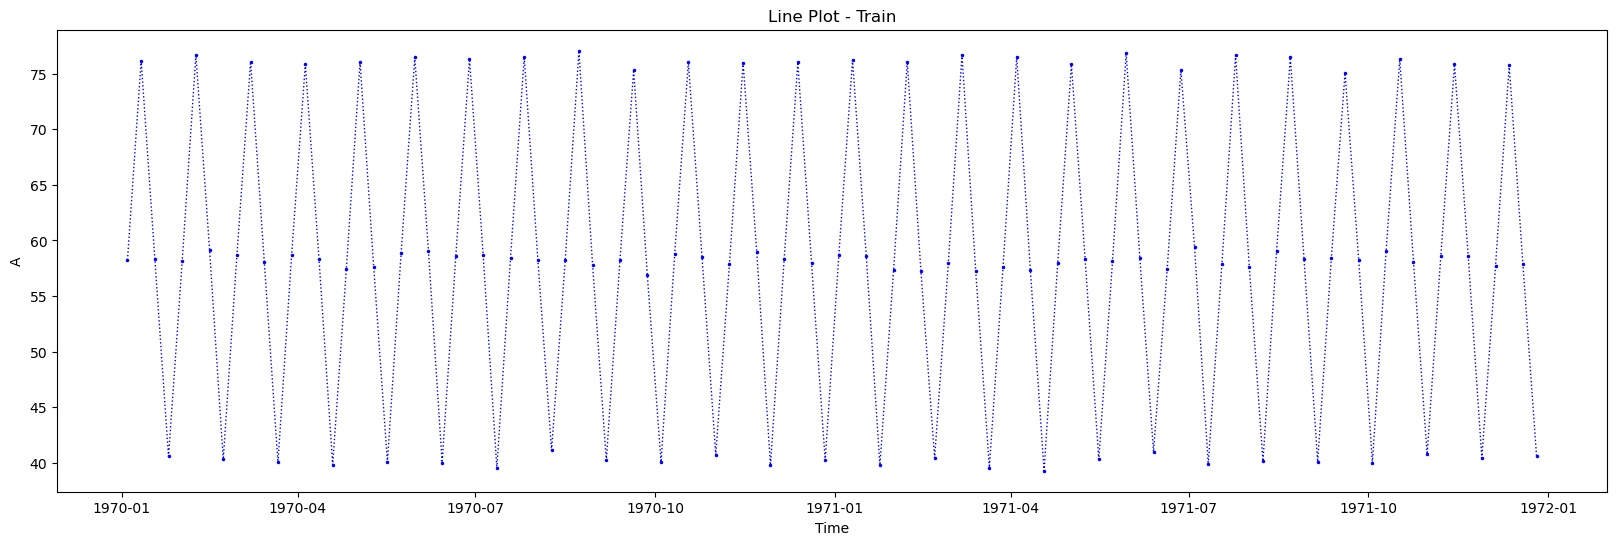

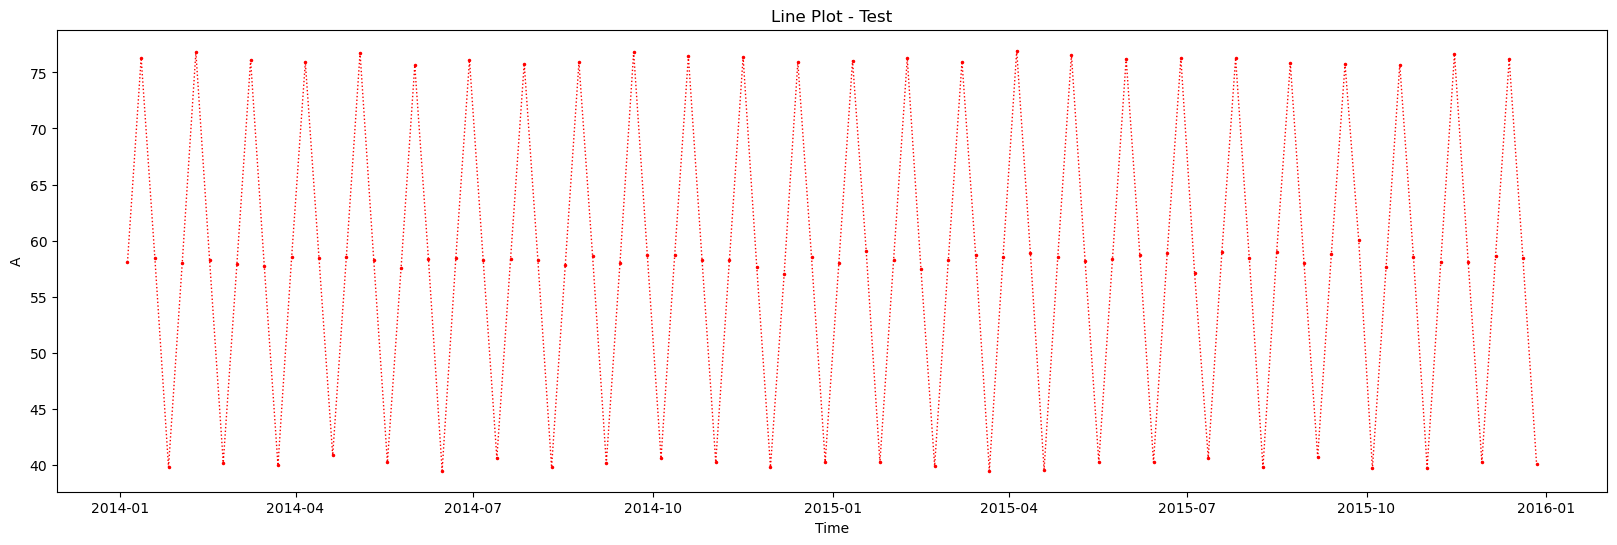

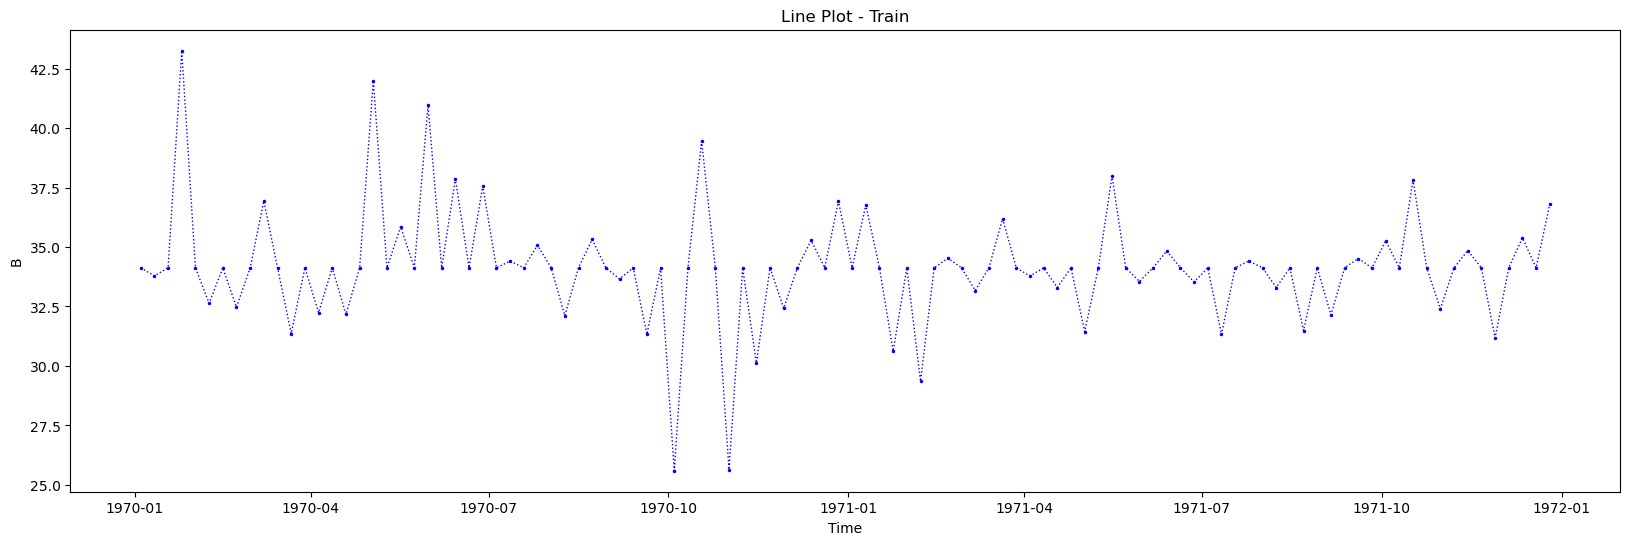

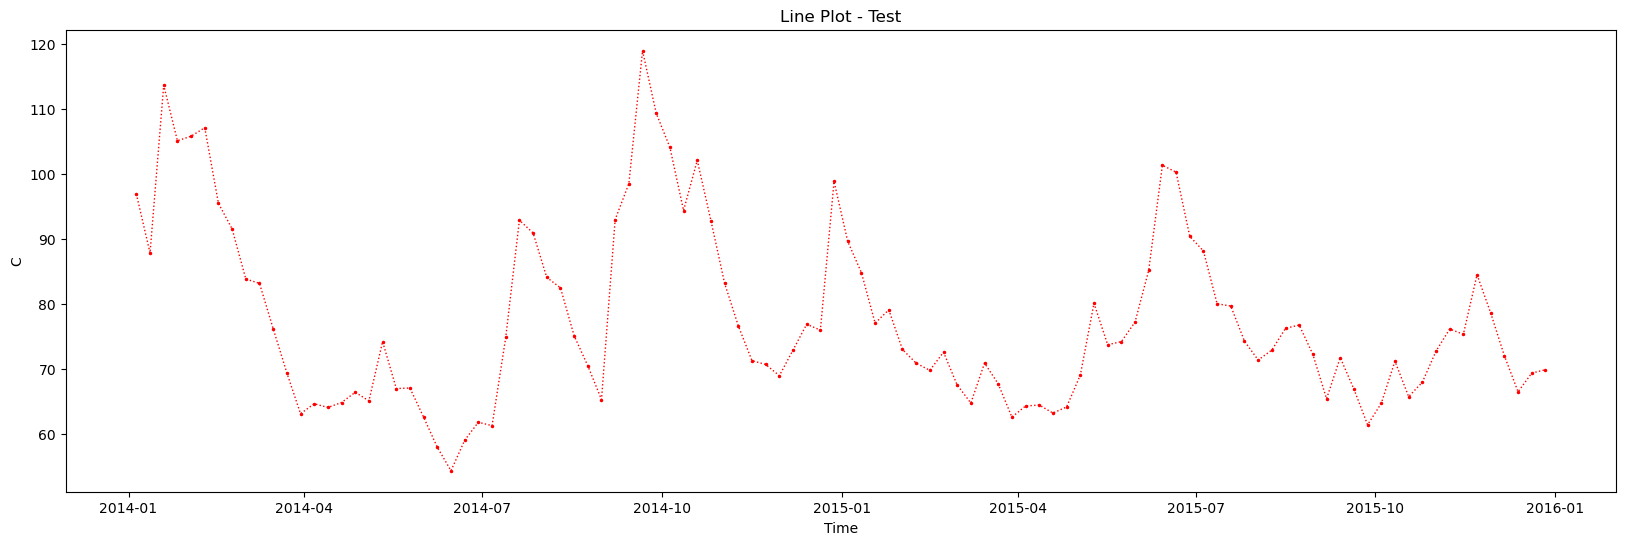

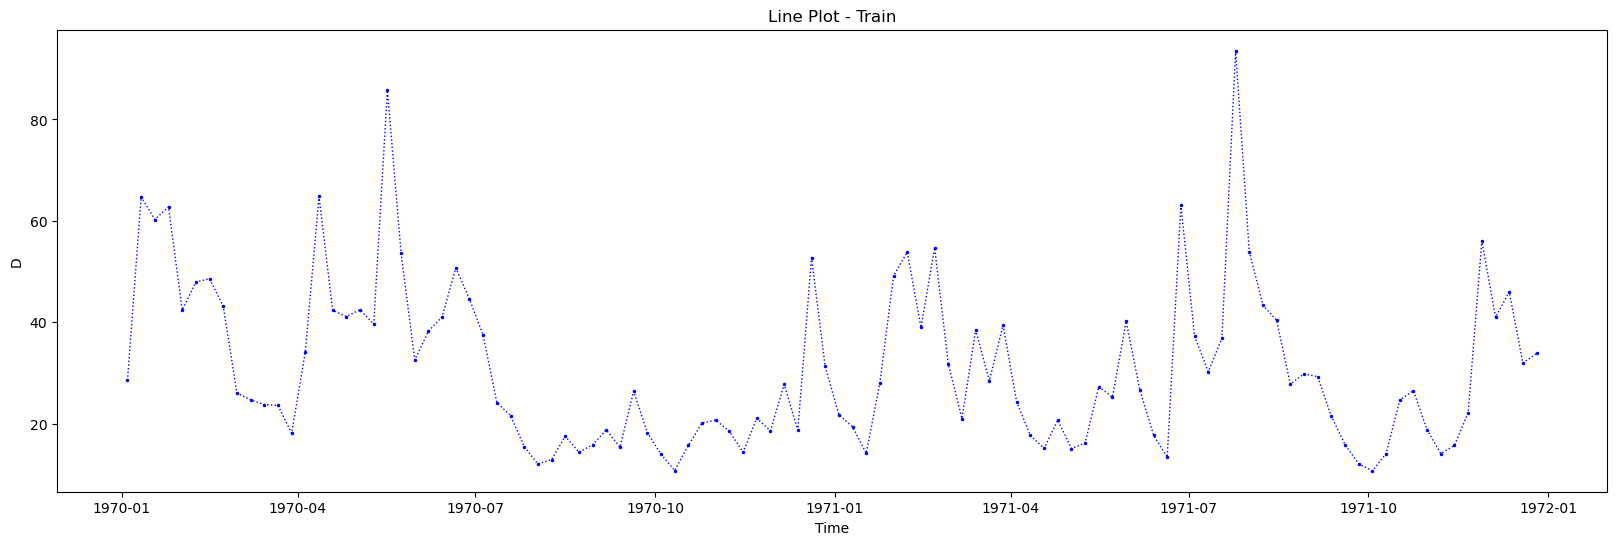

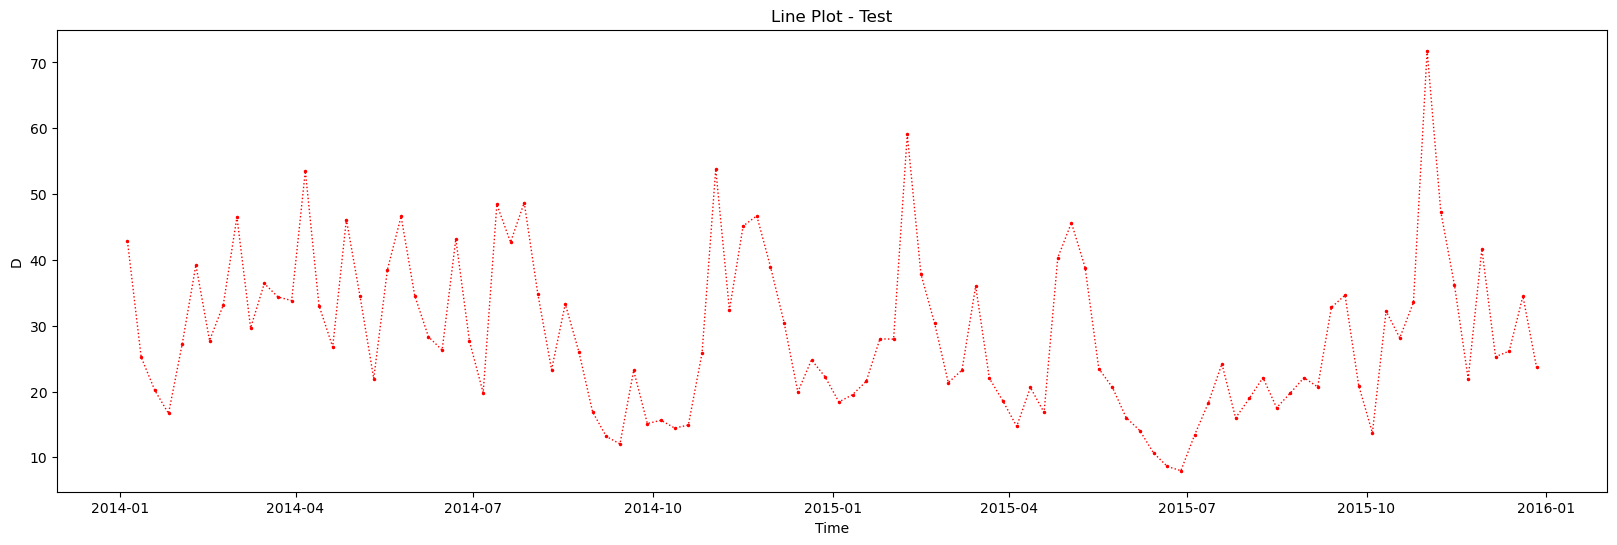

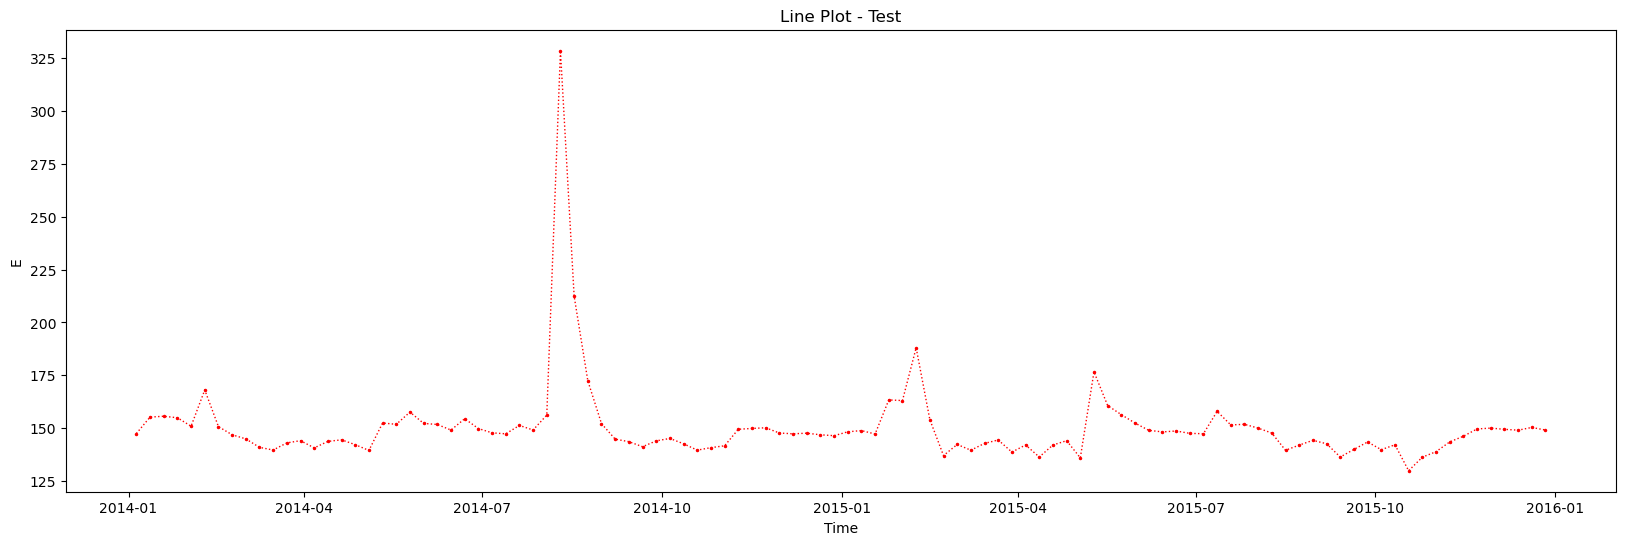

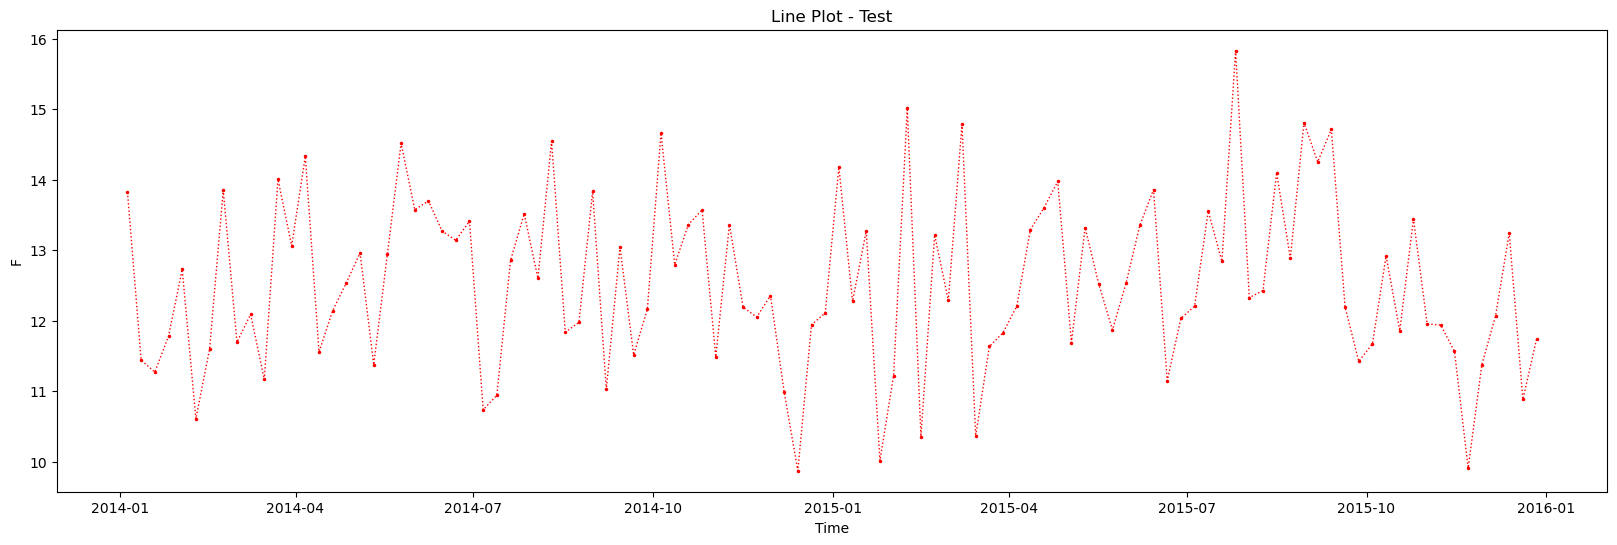

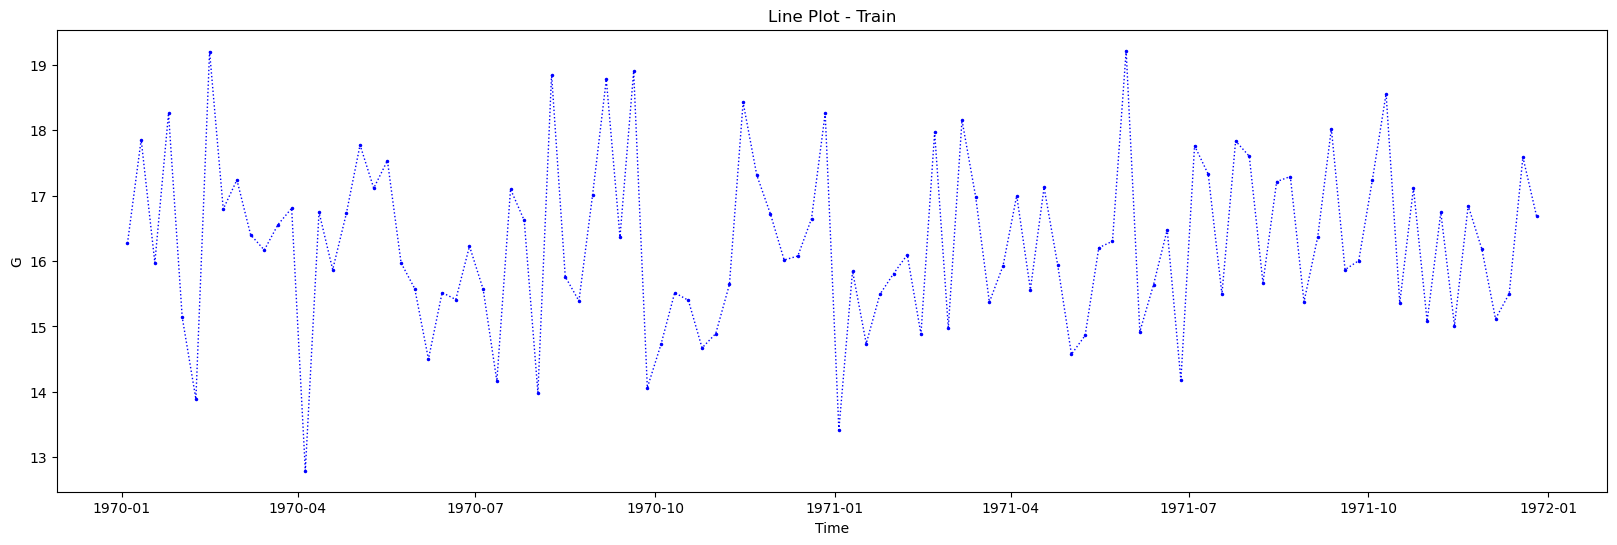

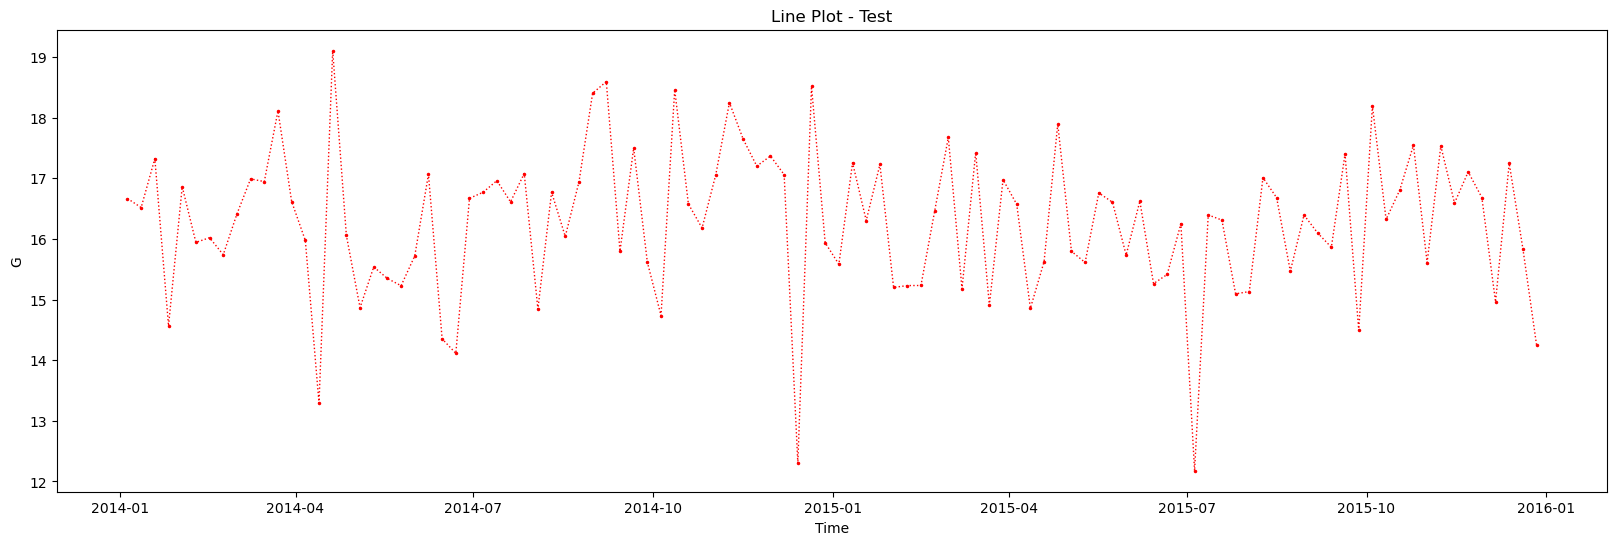

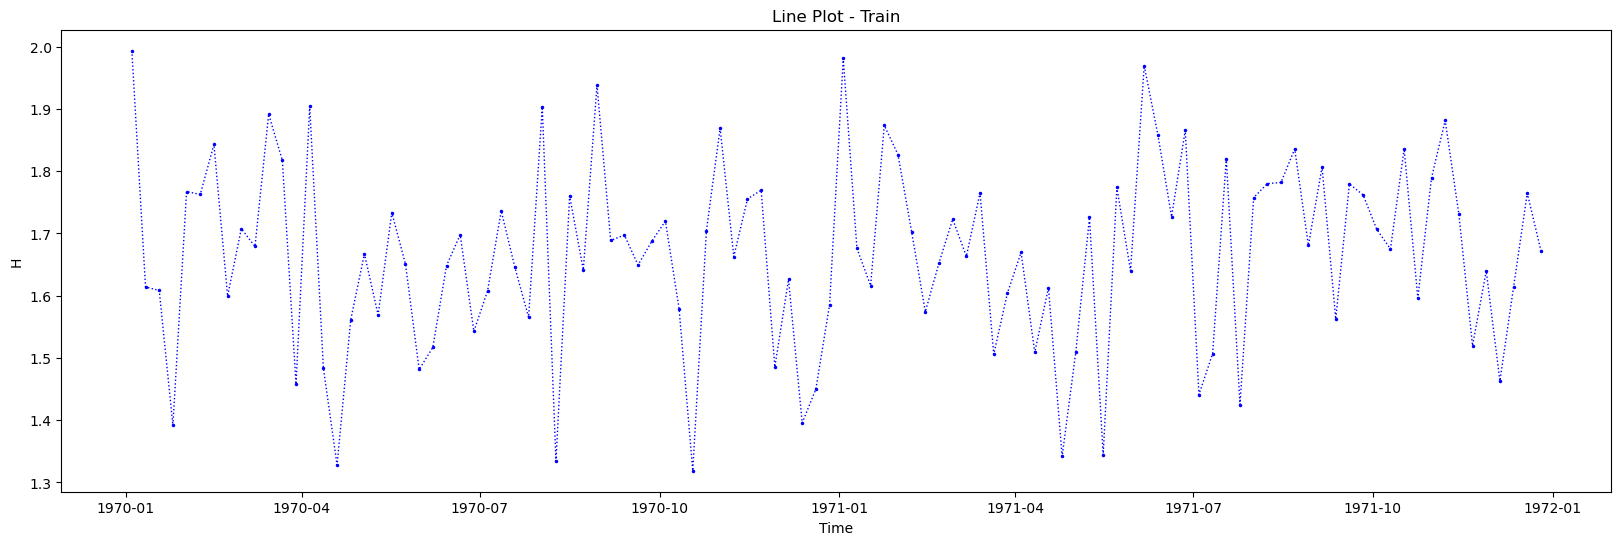

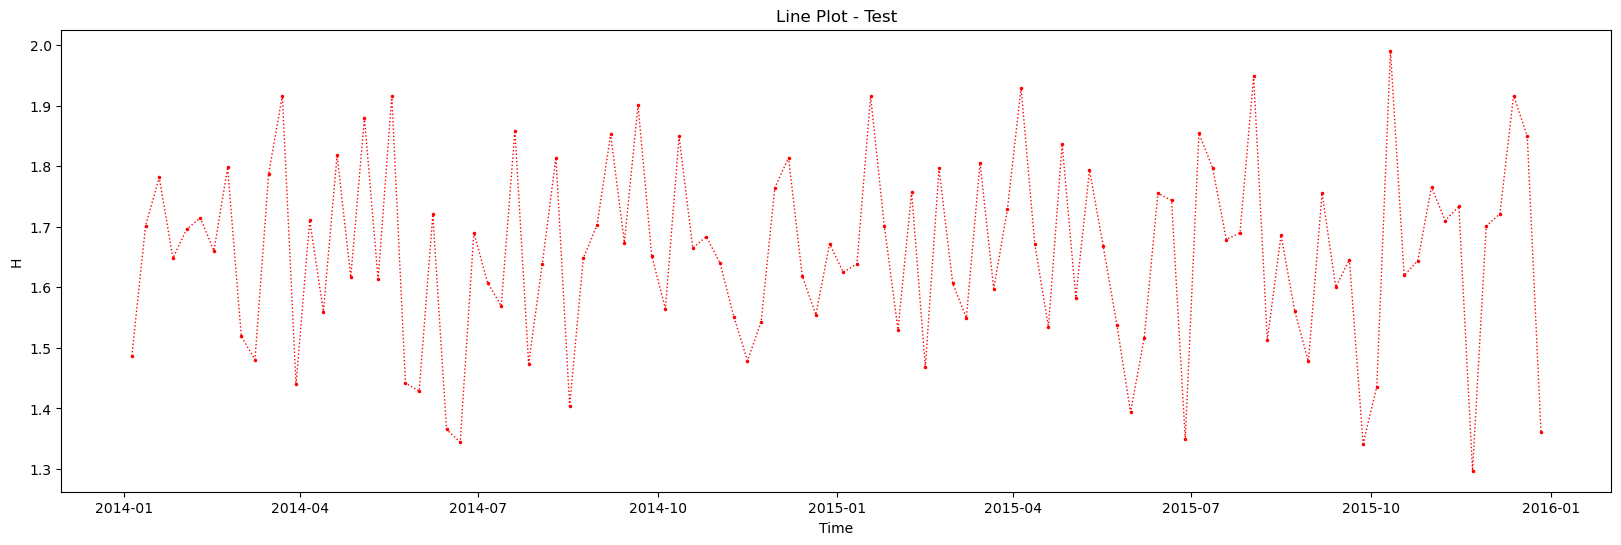

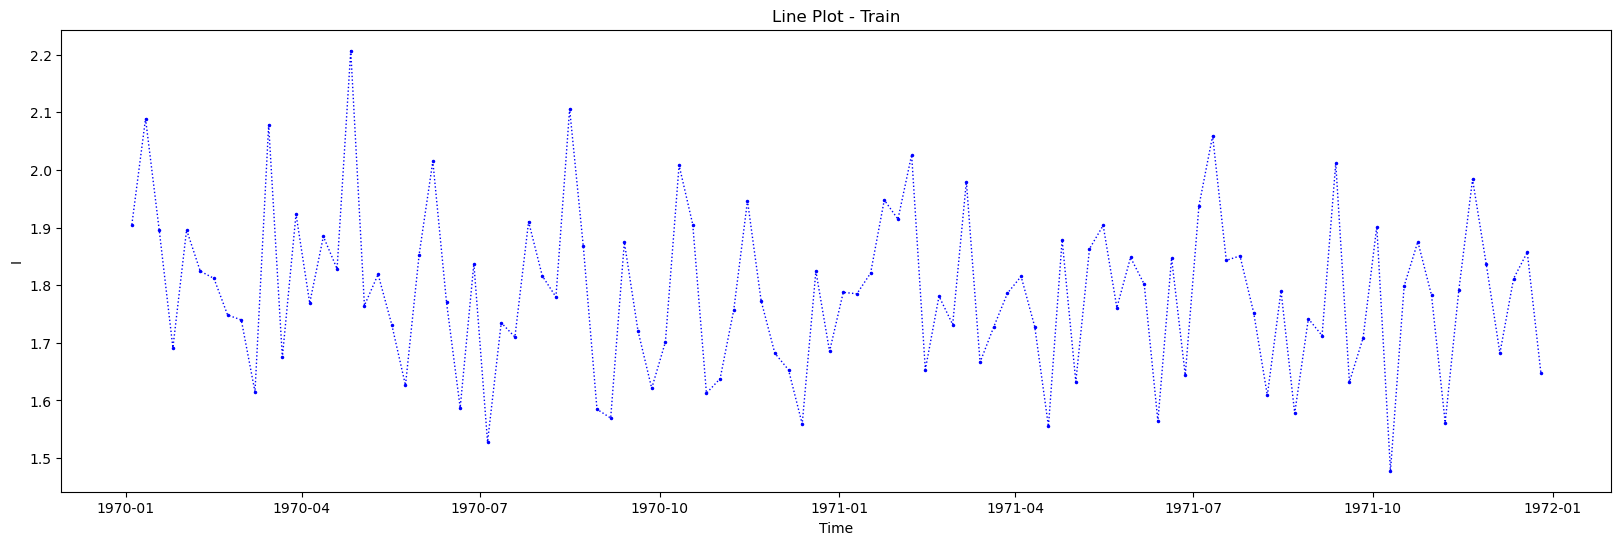

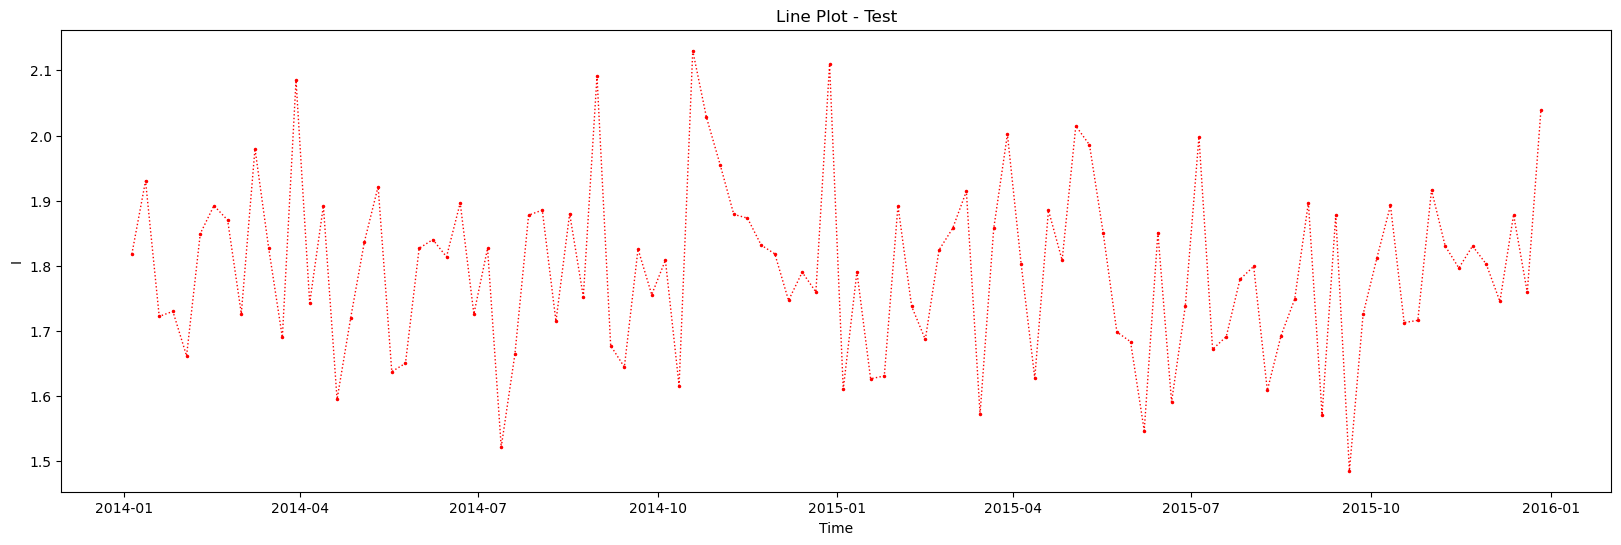

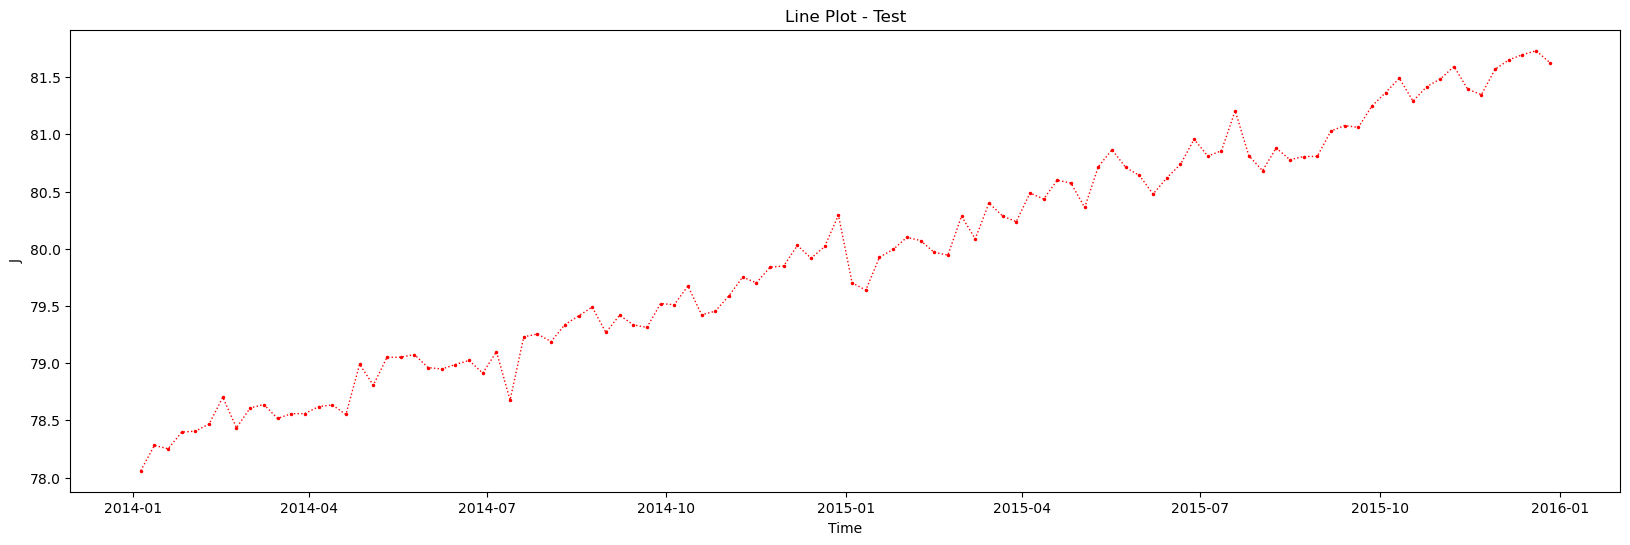

In [55]:
first_two_years = df_train.loc[df_train.index[0]:str(df_train.index[0].year + 1)]
last_two_years = df_train.loc[str(df_train.index[-1].year - 1):df_train.index[-1]]

first_two_years.index=pd.to_datetime(first_two_years.index)
last_two_years.index=pd.to_datetime(last_two_years.index)

for i in column_Names:
    plt.figure(figsize=(20, 6))
    plt.plot(first_two_years[[i]],"b:o", linewidth=1,markersize=1.5)
    plt.title('Line Plot - Train')
    plt.xlabel('Time')
    plt.ylabel(i)
    plt.show()
    
    plt.figure(figsize=(20, 6))
    plt.plot(last_two_years[[i]],"r:o", linewidth=1,markersize=1.5)
    plt.title('Line Plot - Test')
    plt.xlabel('Time')
    plt.ylabel(i)
    plt.show()

'This is first two year of A Column'

'This is last two year of A Column'

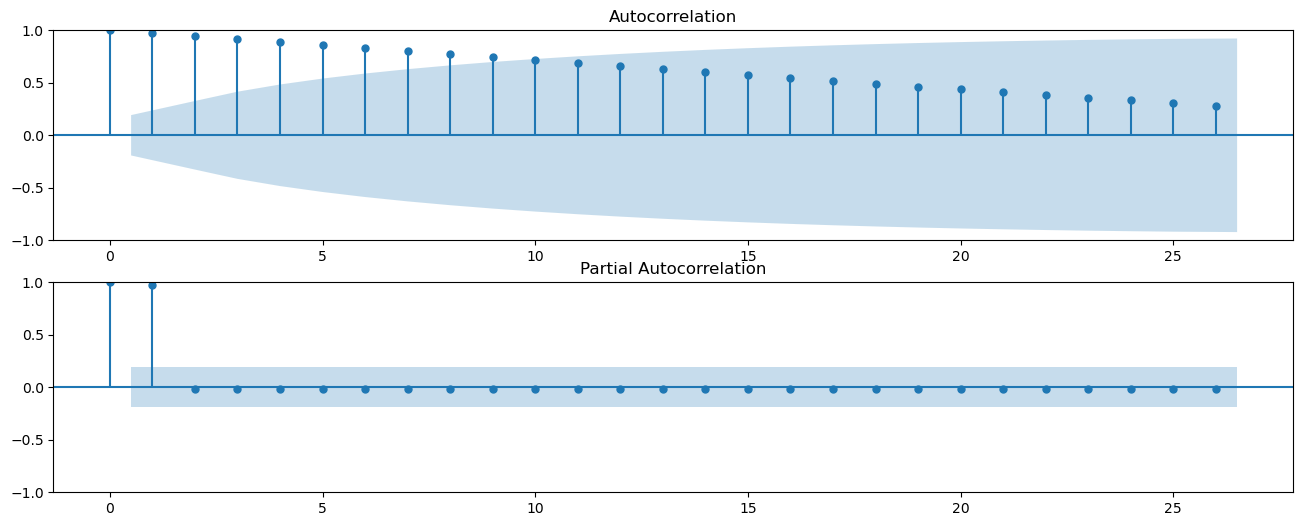

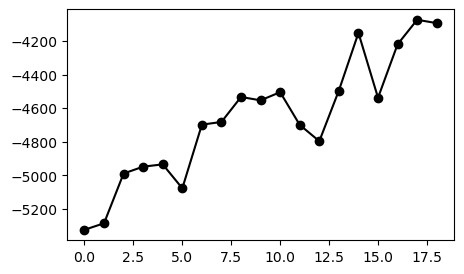

'This is first two year of B Column'

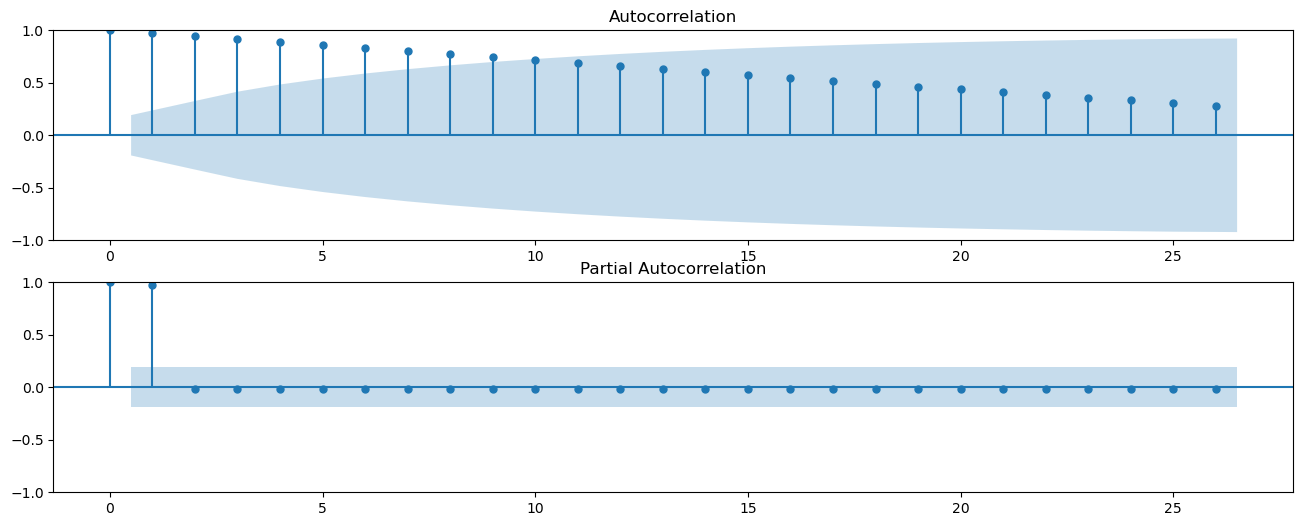

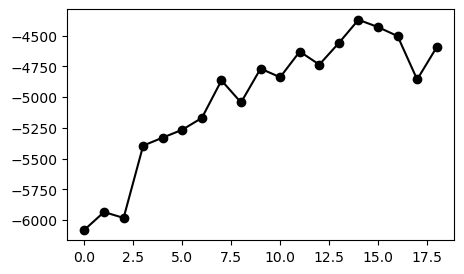

'This is last two year of B Column'

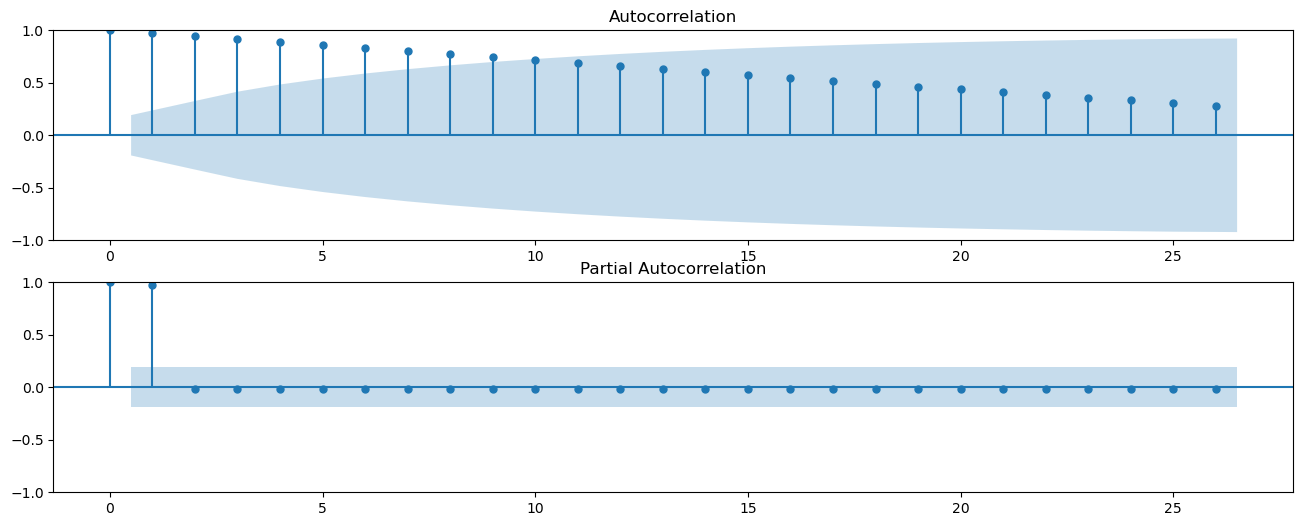

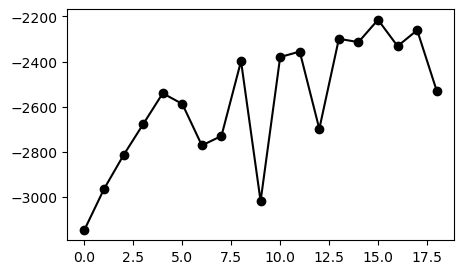

'This is first two year of C Column'

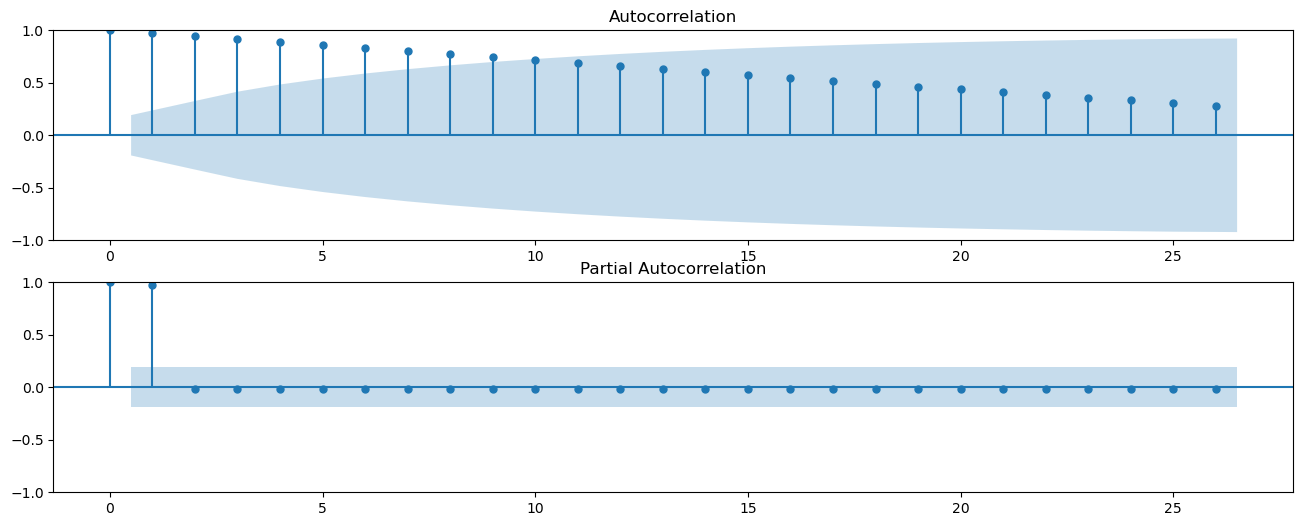

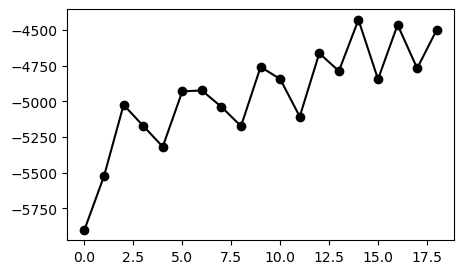

'This is last two year of C Column'

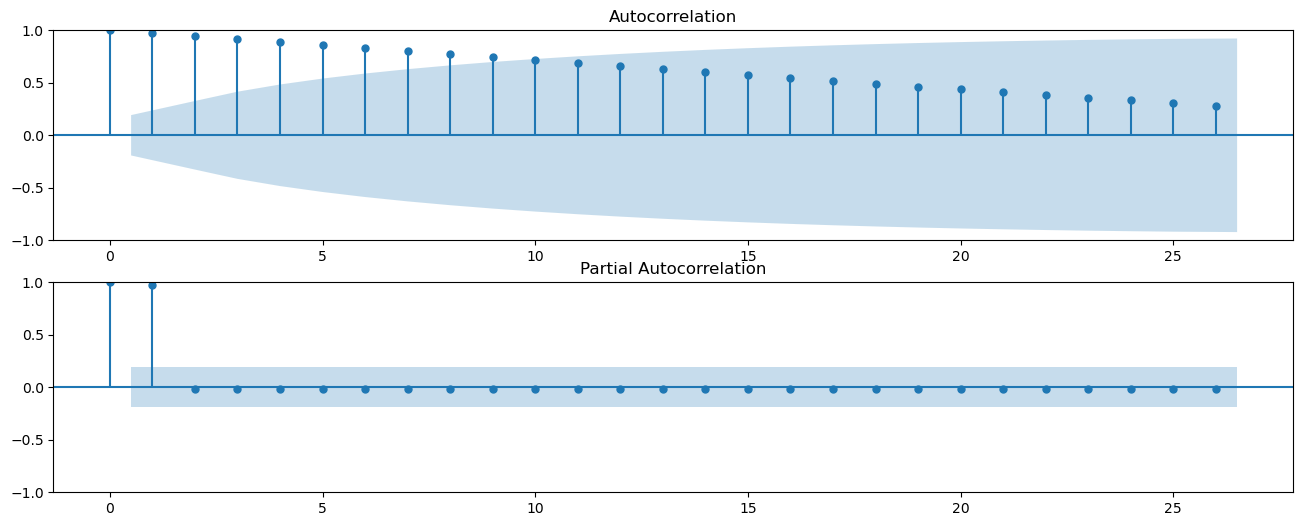

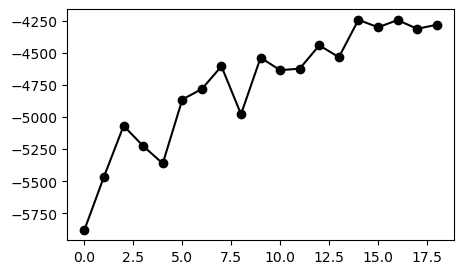

'This is first two year of D Column'

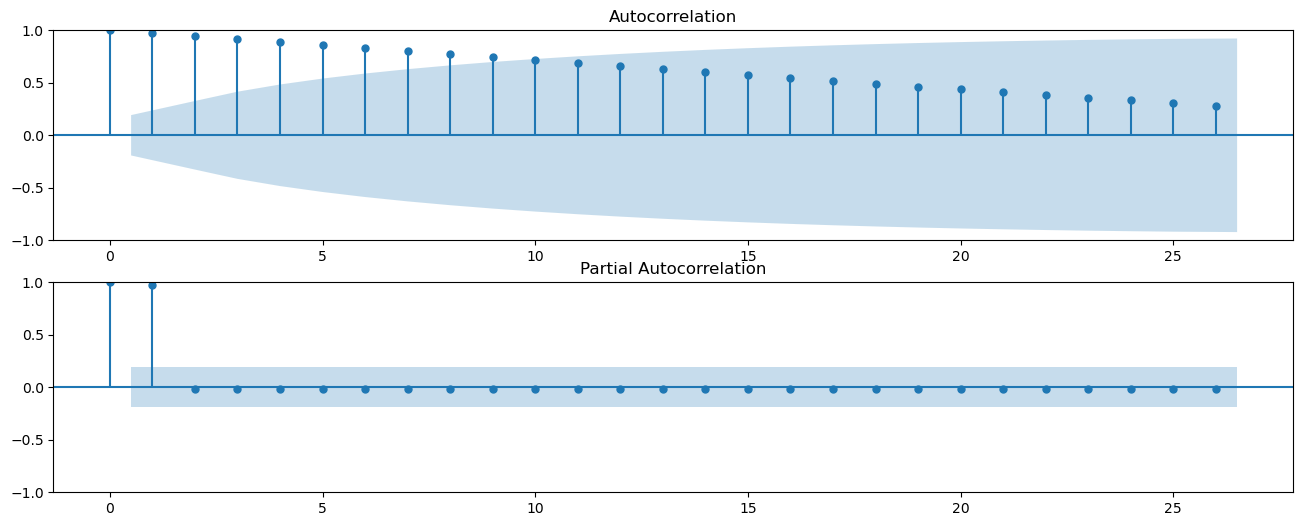

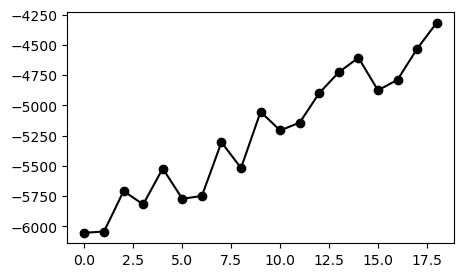

'This is last two year of D Column'

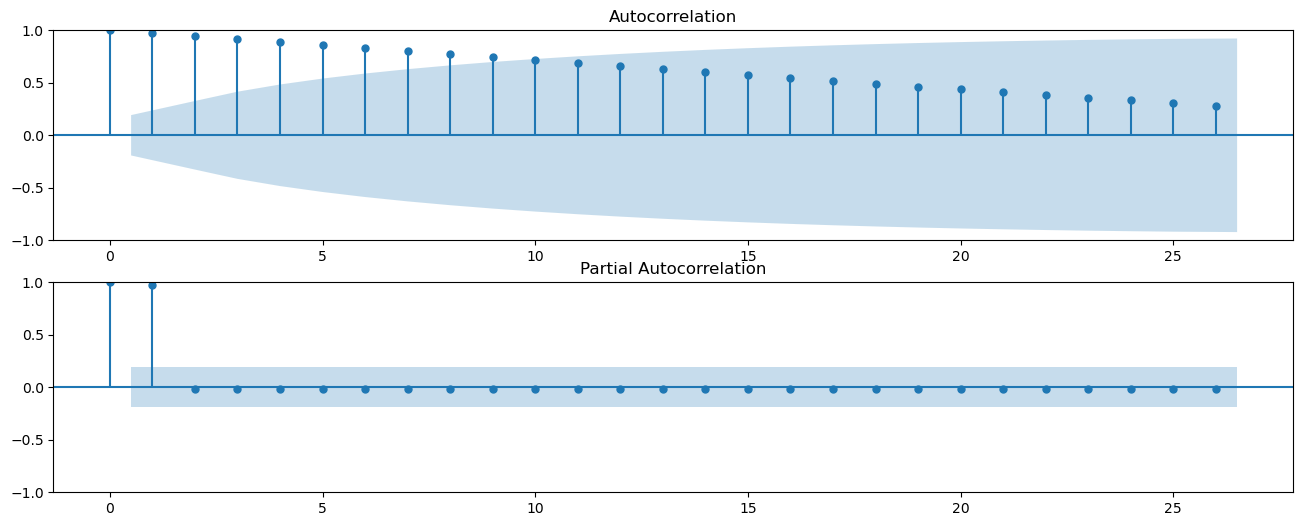

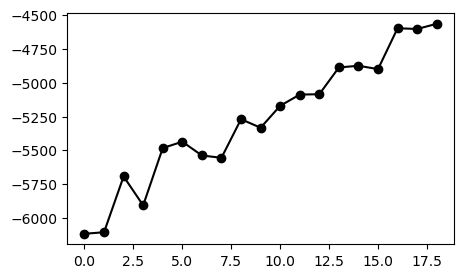

'This is first two year of E Column'

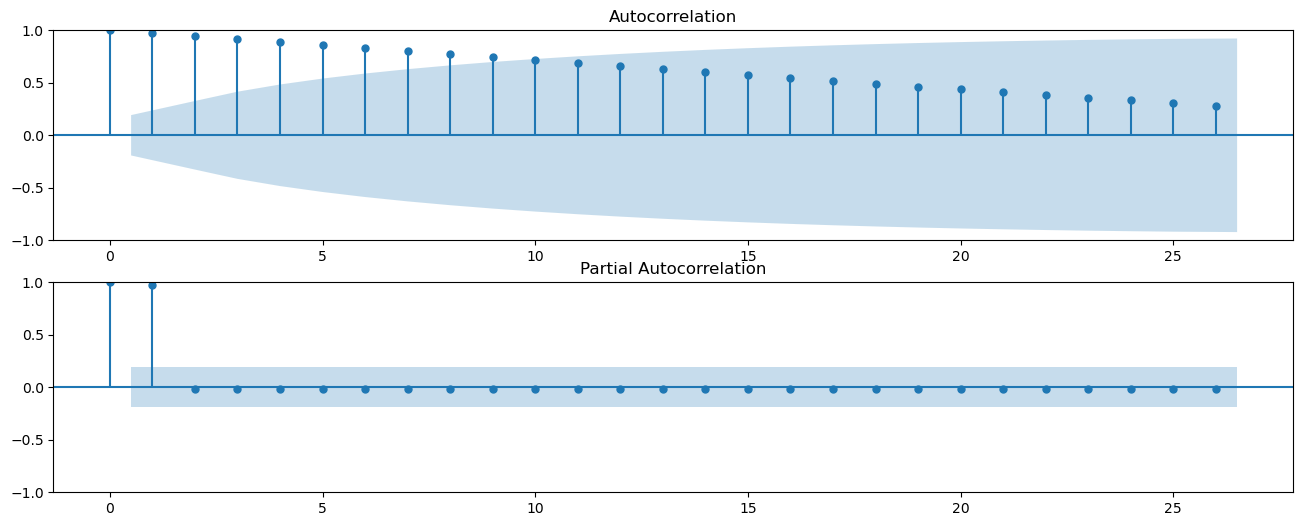

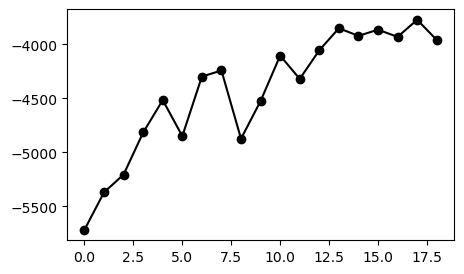

'This is last two year of E Column'

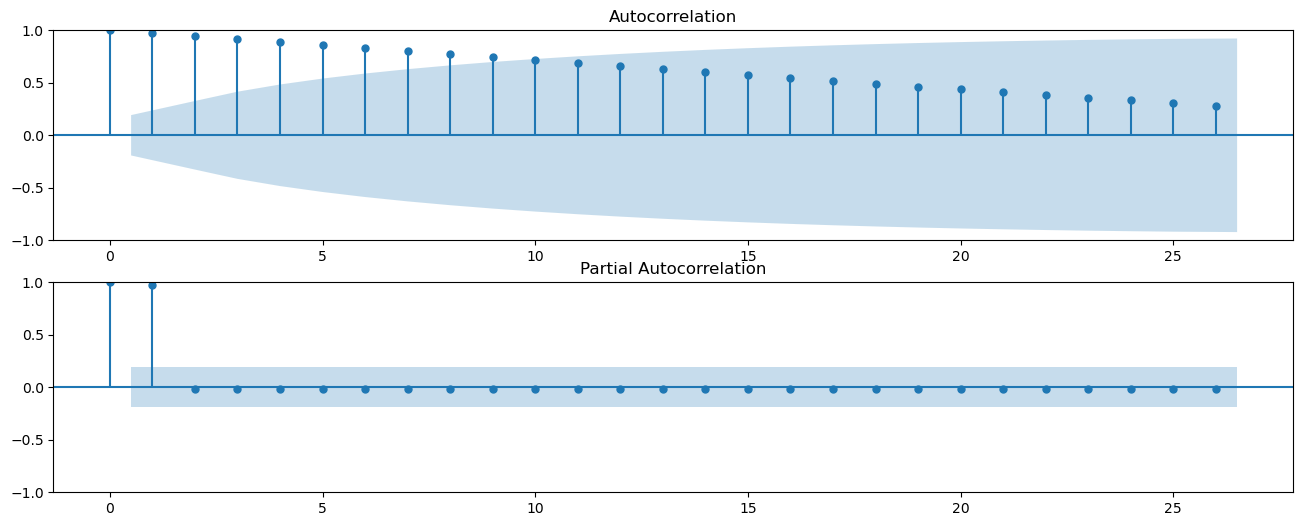

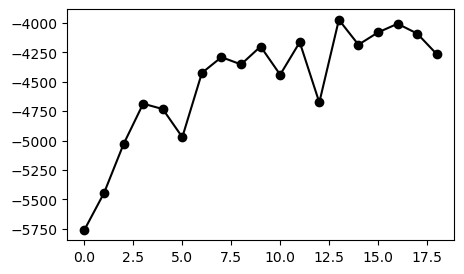

'This is first two year of F Column'

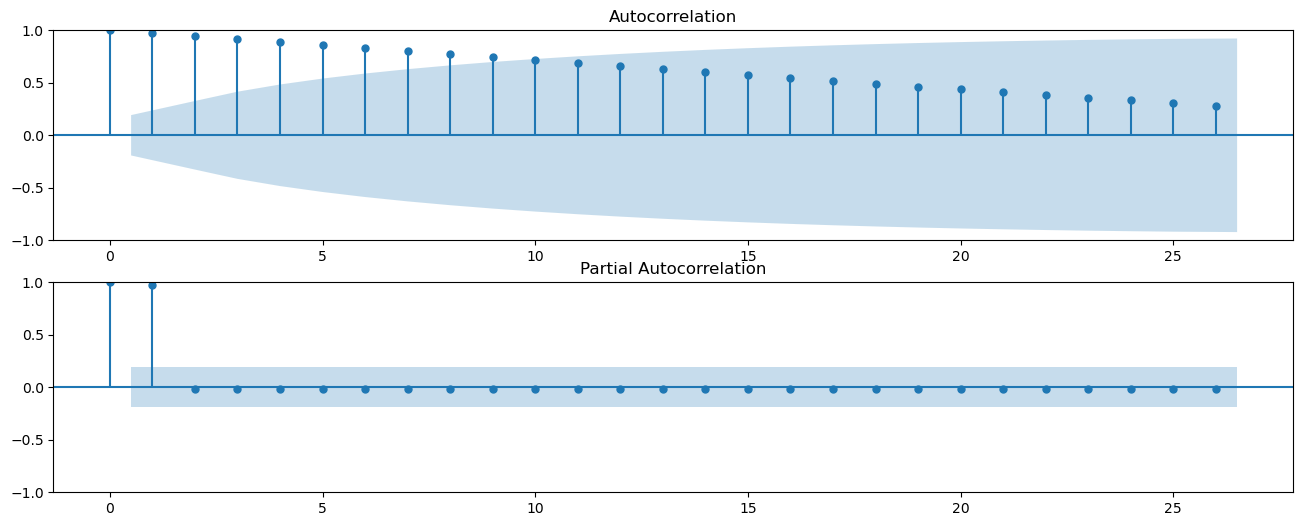

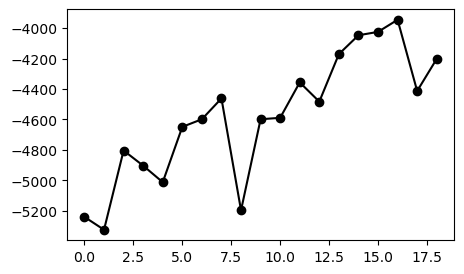

'This is last two year of F Column'

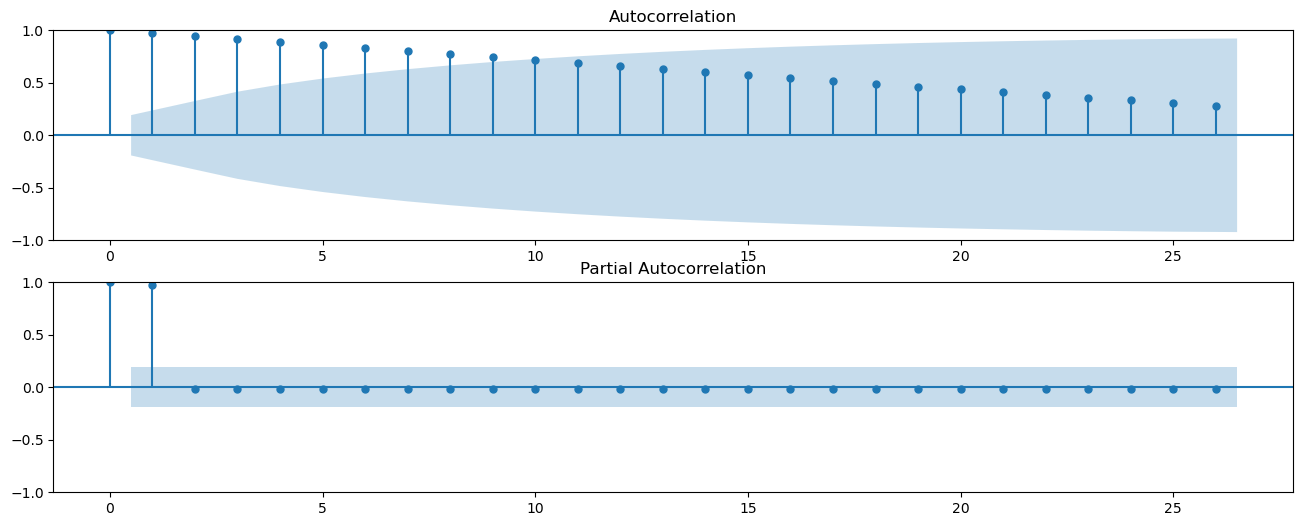

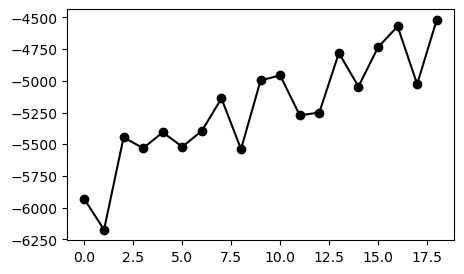

'This is first two year of G Column'

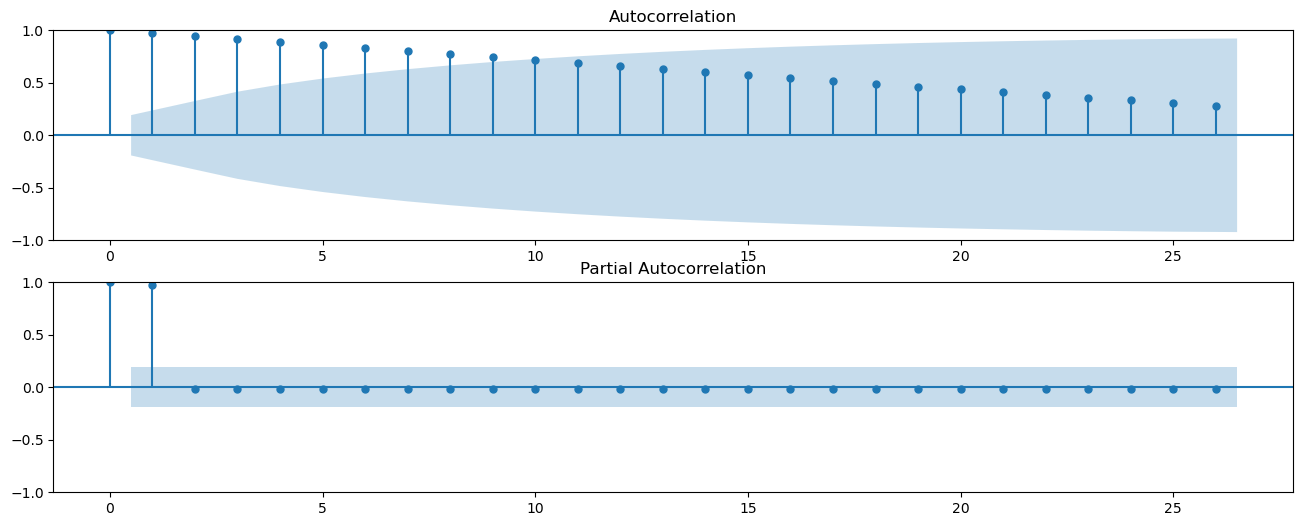

'This is last two year of G Column'

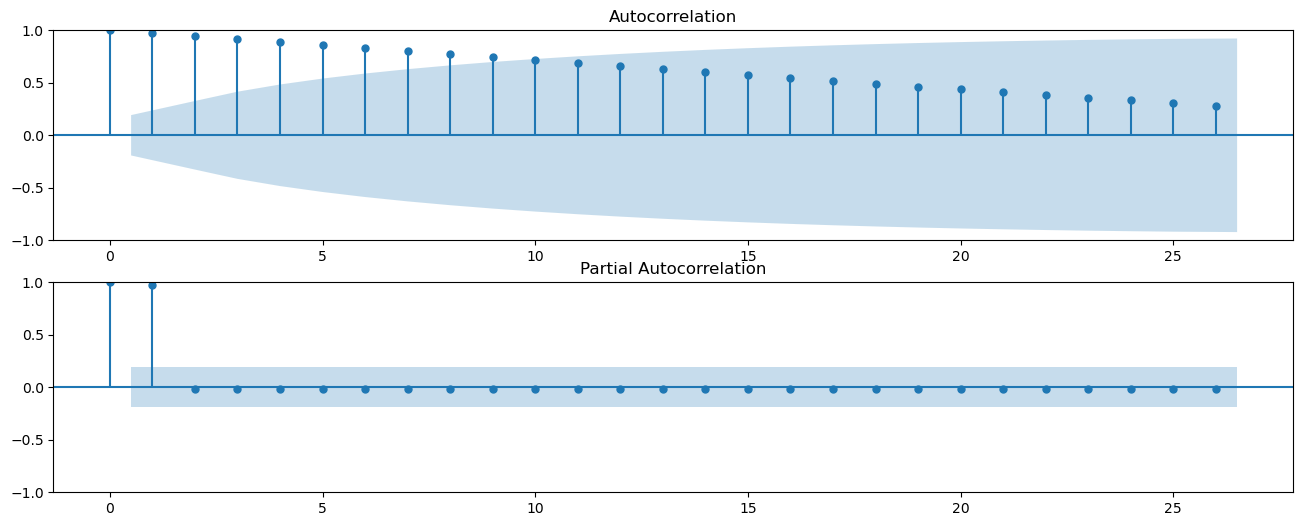

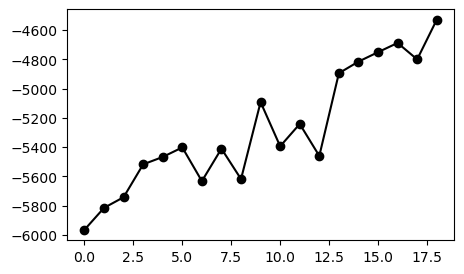

'This is first two year of H Column'

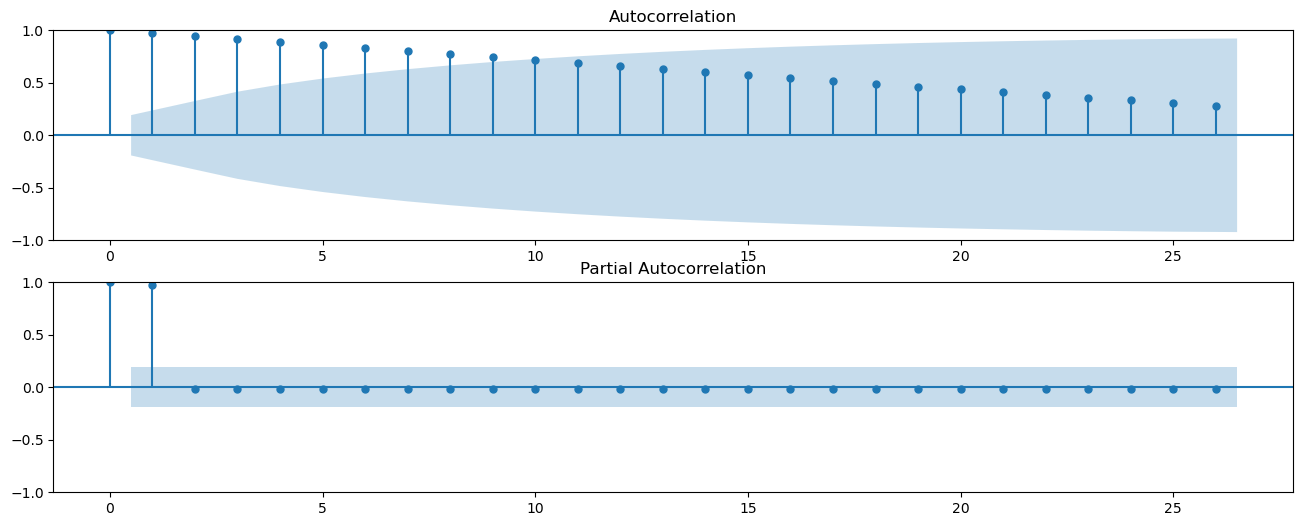

'This is last two year of H Column'

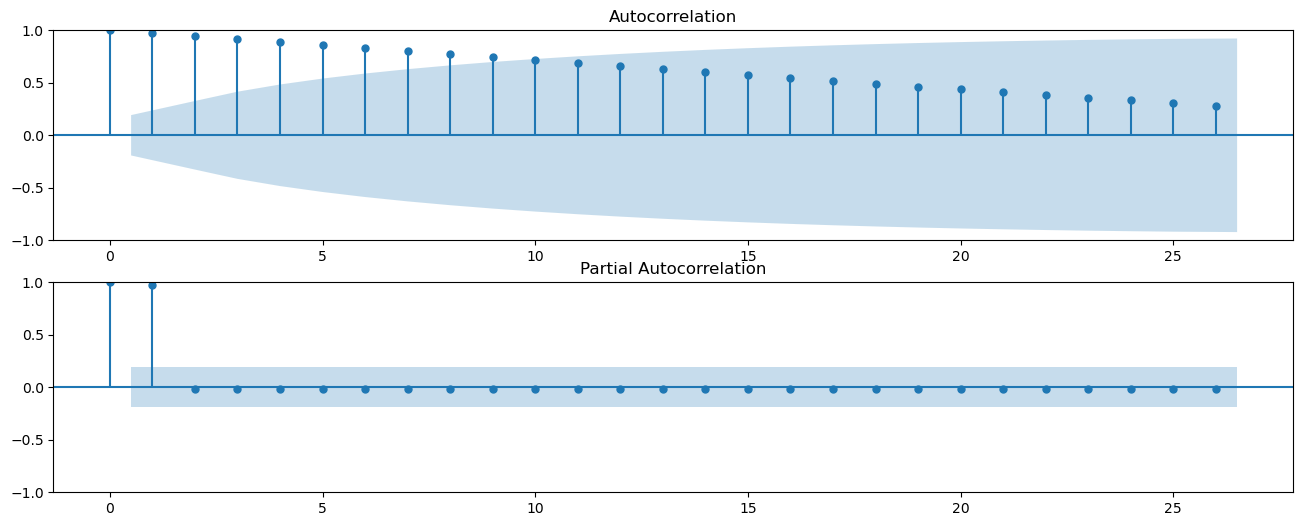

'This is first two year of I Column'

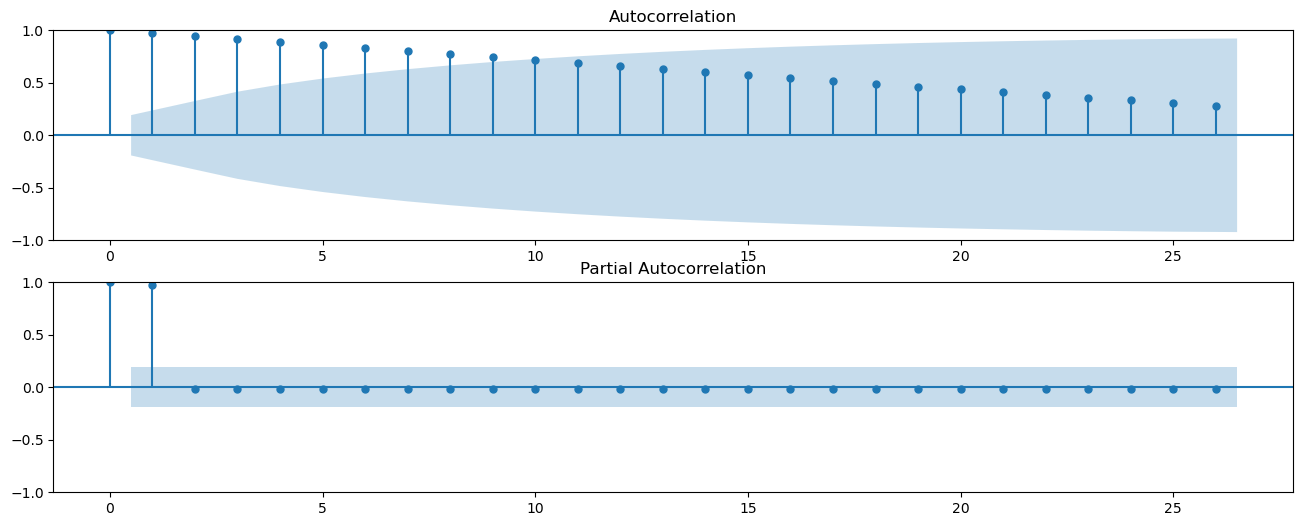

'This is last two year of I Column'

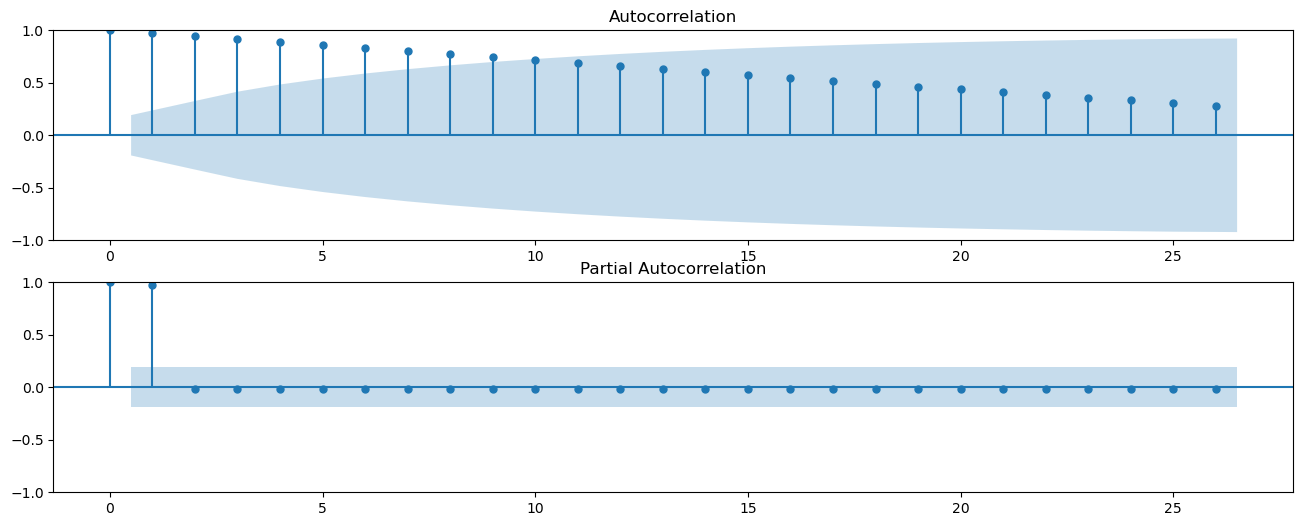

'This is first two year of J Column'

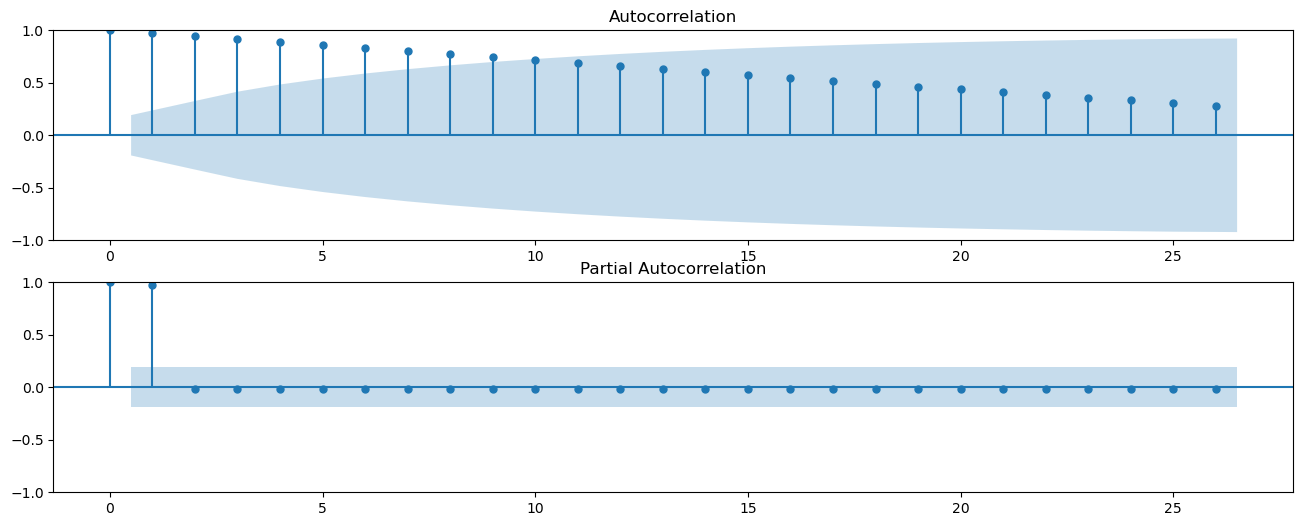

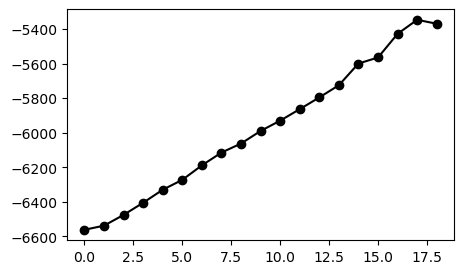

'This is last two year of J Column'

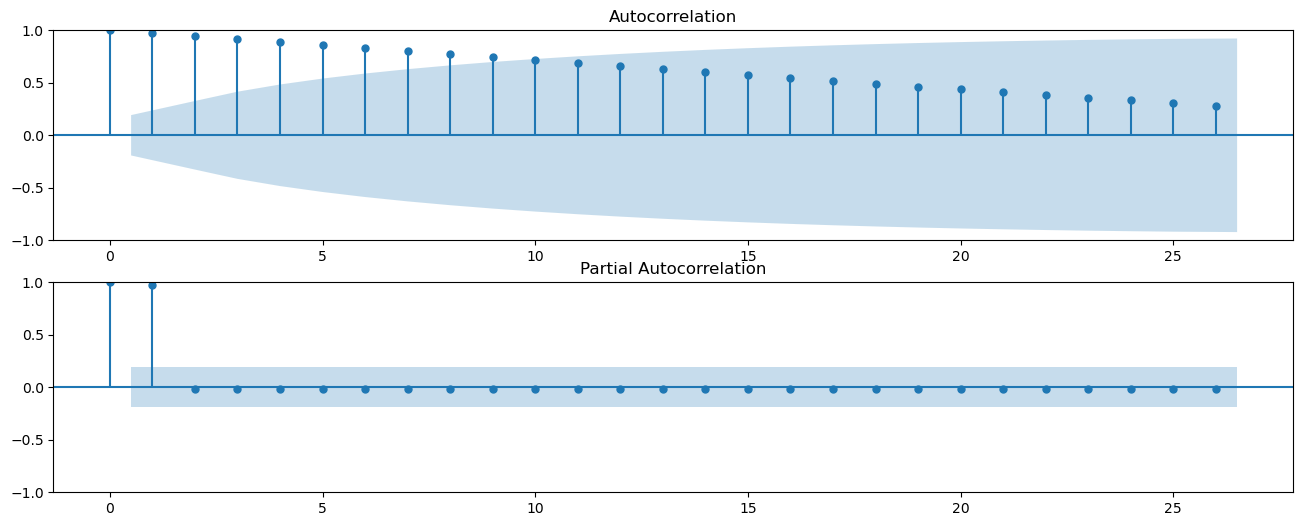

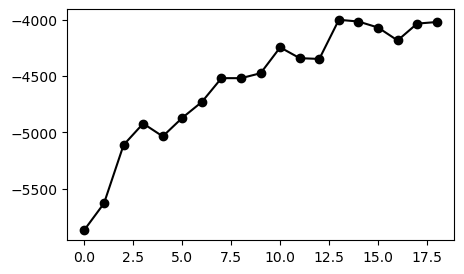

In [57]:


for i in column_Names:
    stl = STL(first_two_years[[i]].squeeze(), seasonal=53)
    ts_dec = stl.fit()
    
    display("This is first two year of " + i + " Column")
    
    fig = plt.figure(figsize=(16, 6))
    ax1 = fig.add_subplot(211)
    fig = sm.graphics.tsa.plot_acf(ts_dec.trend, lags=int(len(ts_dec.trend)/4), ax=ax1)
    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(ts_dec.trend, lags=int(len(ts_dec.trend)/4), ax=ax2)

    fig = plt.figure(figsize=(5, 3))
    bic_vals=[AutoReg(ts_dec.trend, lags=lag).fit().bic for lag in range(1,20)]
    plt.plot(bic_vals,marker='o',color='k')
    plt.show()
    
    stl = STL(last_two_years[[i]].squeeze(), seasonal=53)
    ts_dec_2 = stl.fit()
    
    display("This is last two year of " + i + " Column")
    
    fig = plt.figure(figsize=(16, 6))
    ax1 = fig.add_subplot(211)
    fig = sm.graphics.tsa.plot_acf(ts_dec_2.trend, lags=int(len(ts_dec_2.trend)/4), ax=ax1)
    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(ts_dec_2.trend, lags=int(len(ts_dec_2.trend)/4), ax=ax2)

    fig = plt.figure(figsize=(5, 3))
    bic_vals=[AutoReg(ts_dec_2.trend, lags=lag).fit().bic for lag in range(1,20)]
    plt.plot(bic_vals,marker='o',color='k')
    plt.show()
    
    

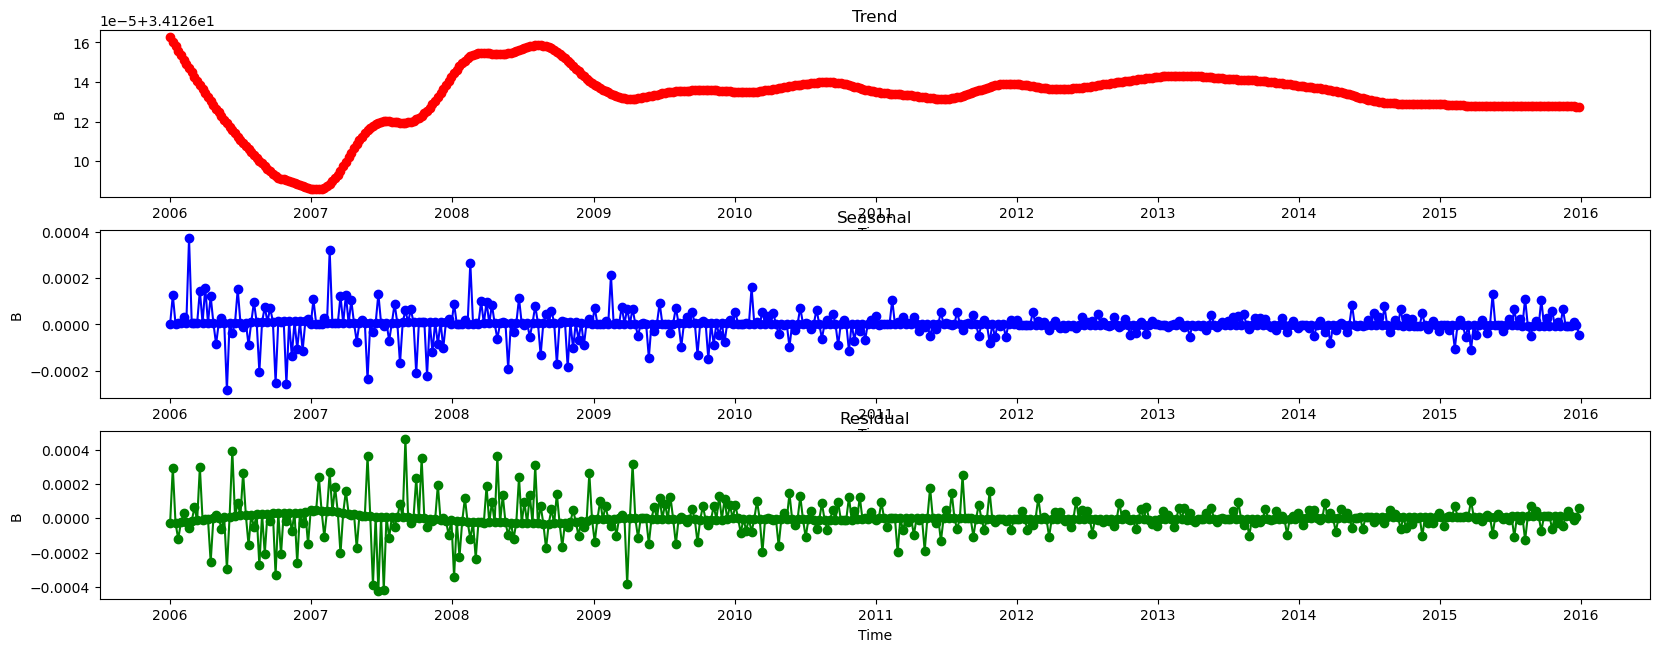

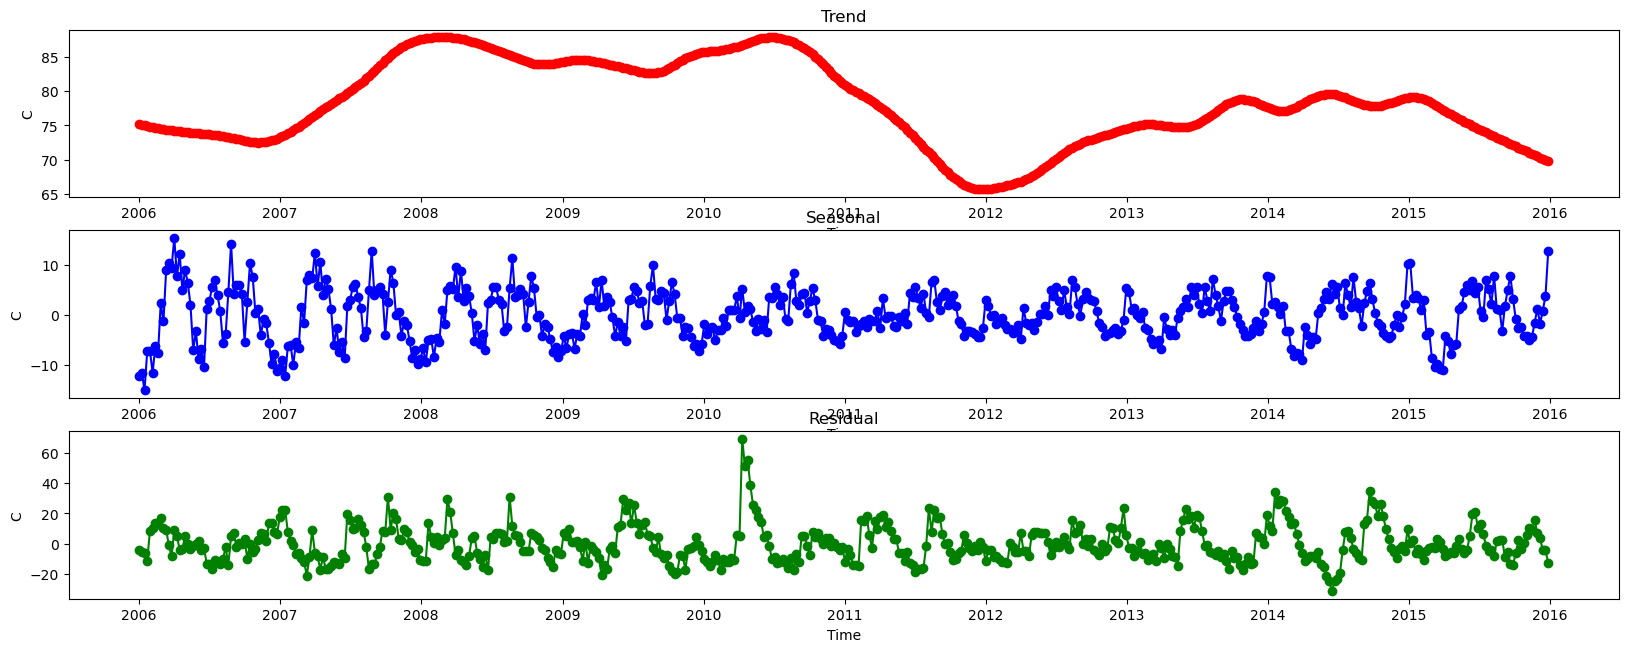

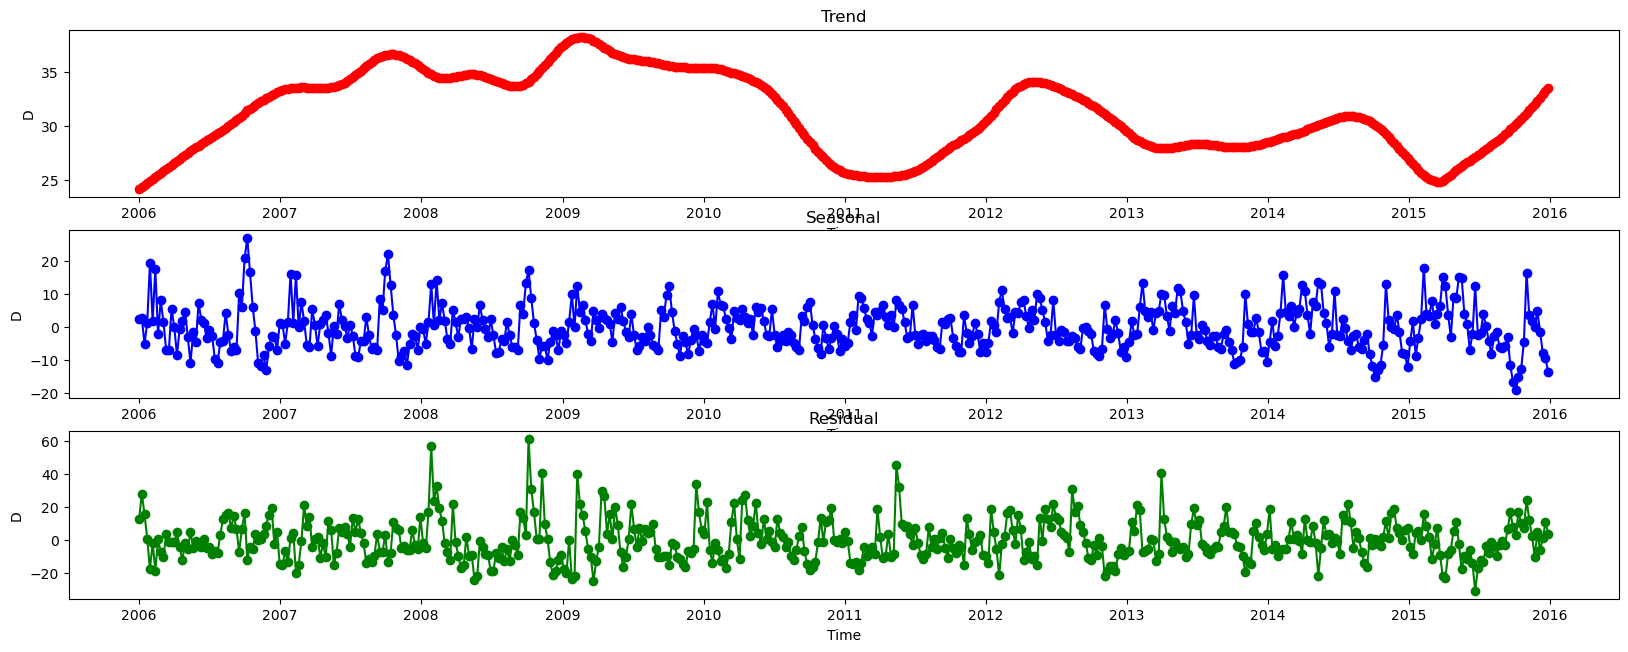

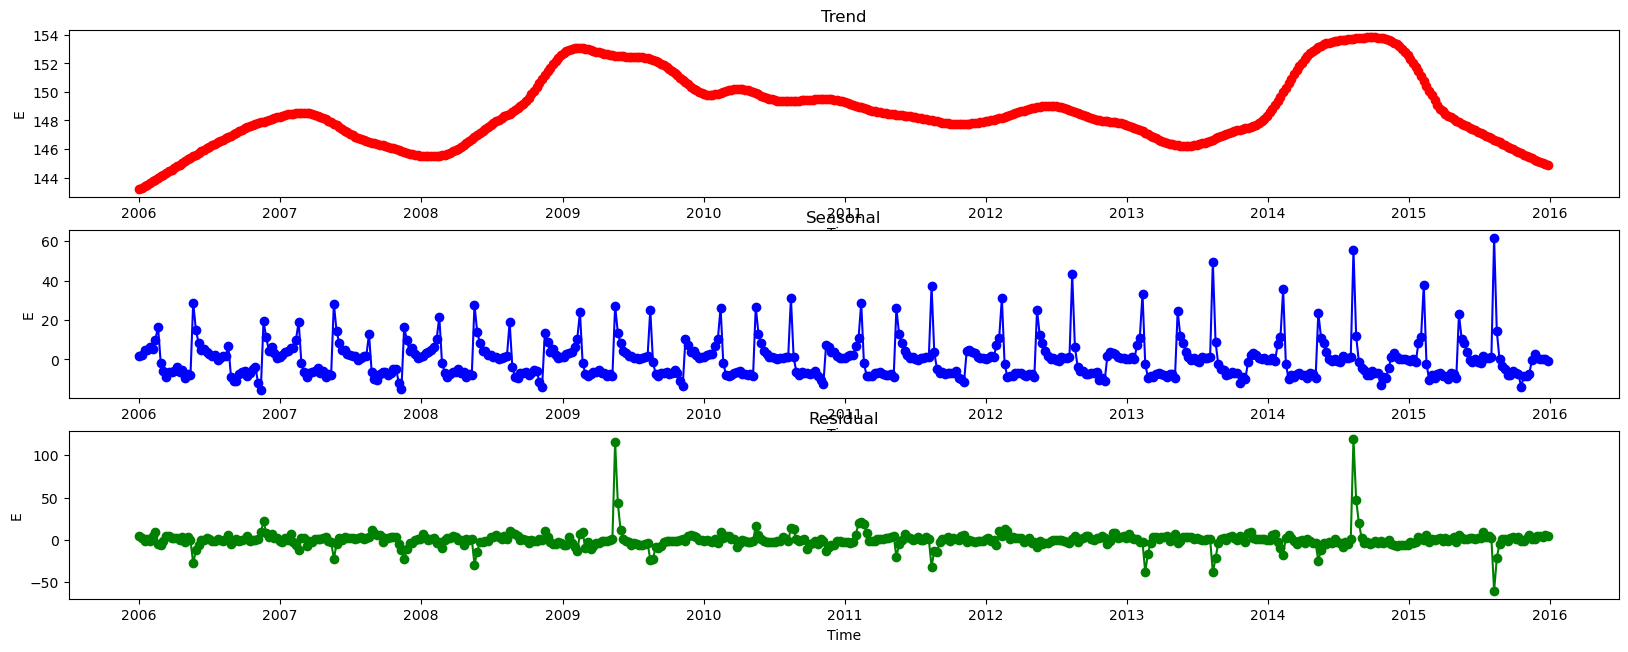

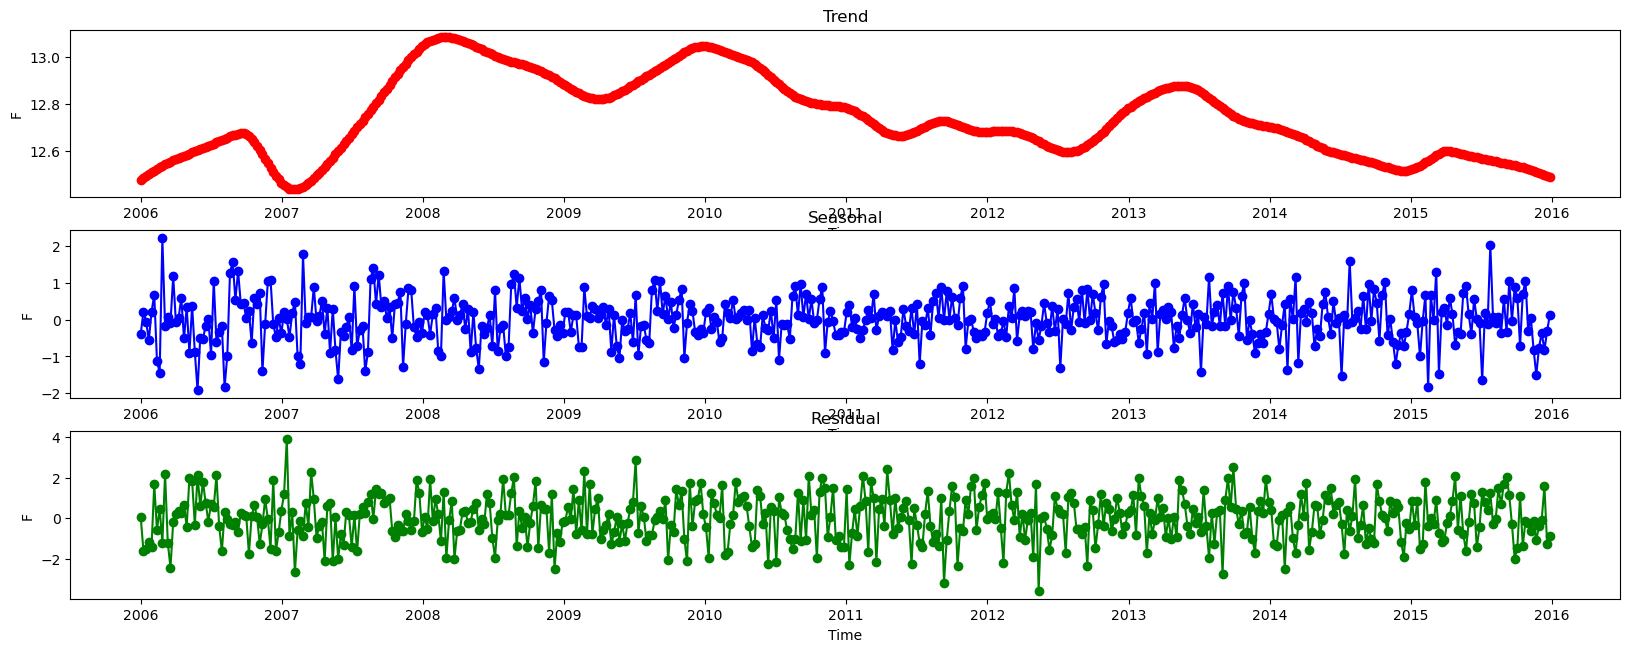

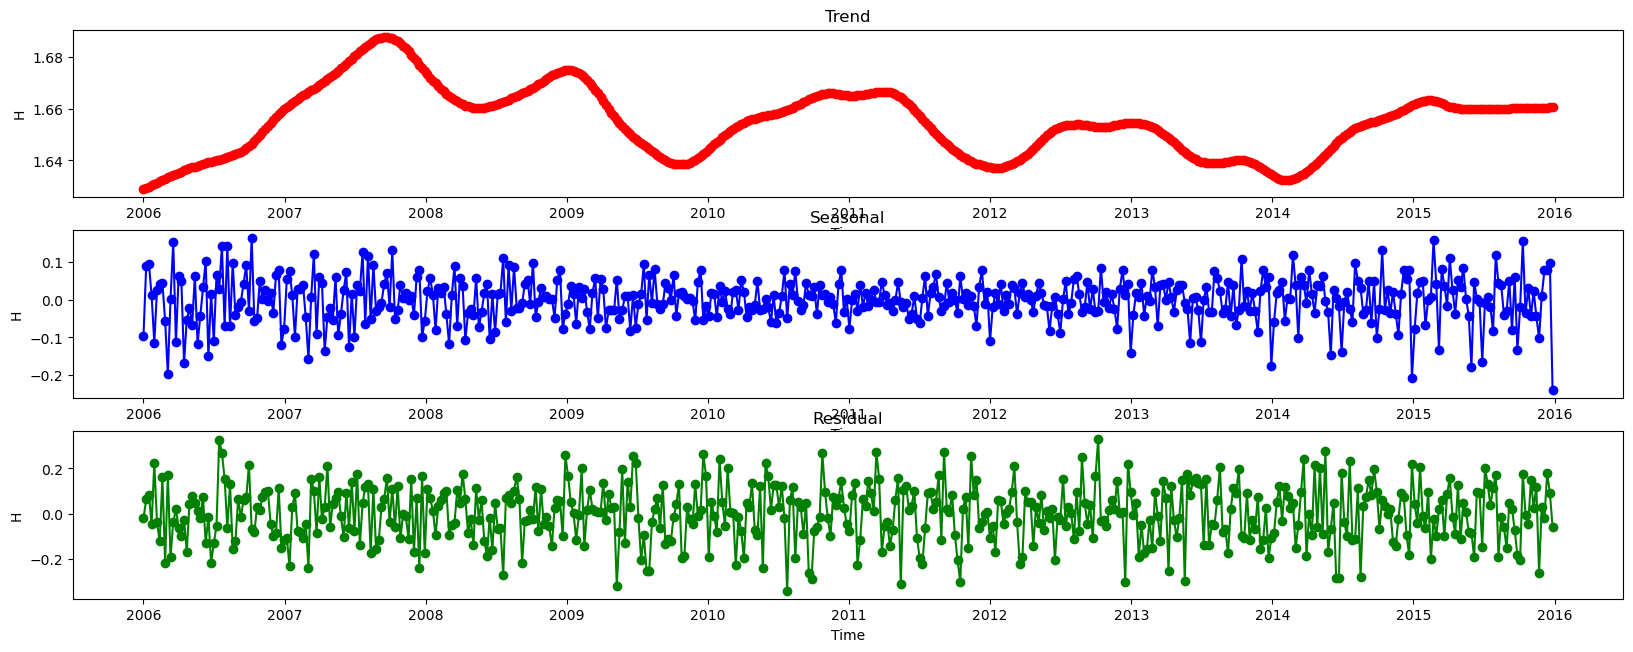

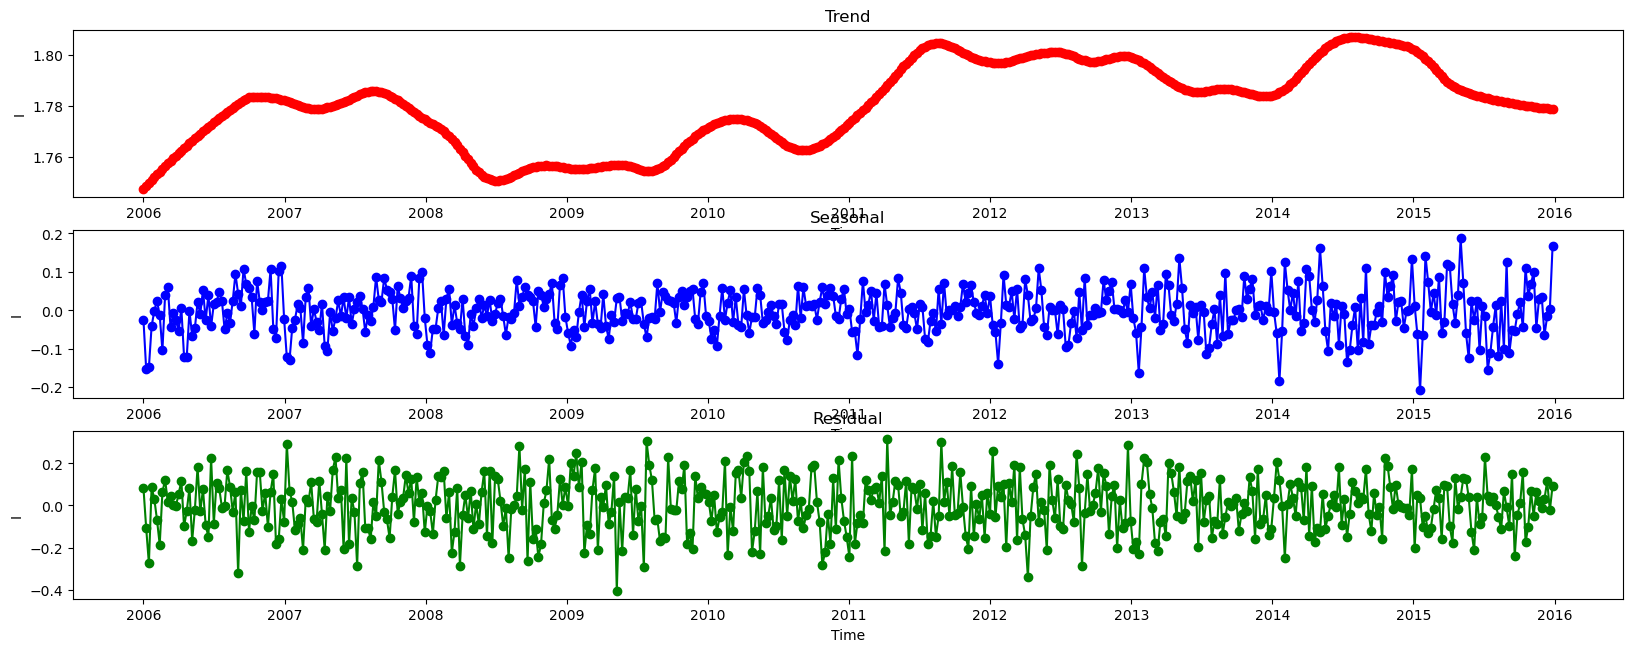

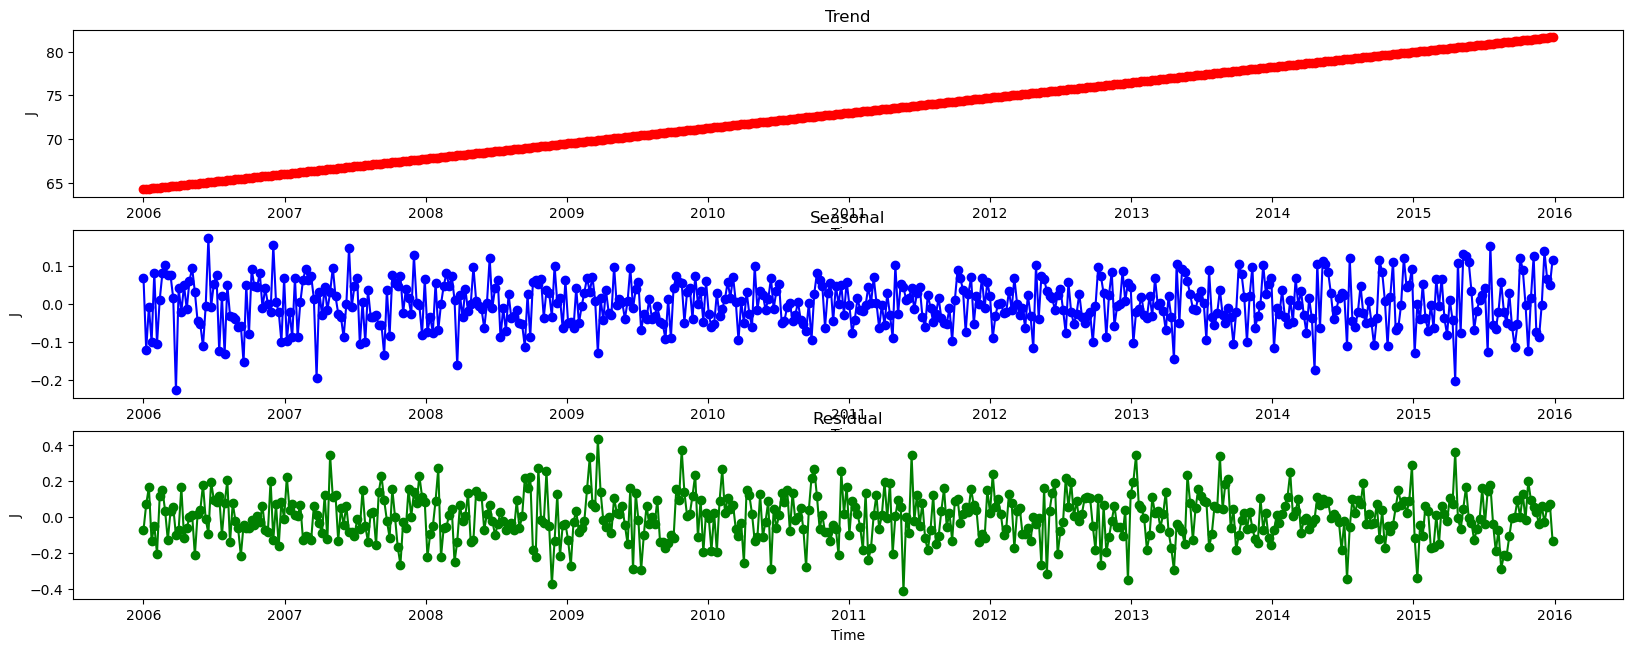

In [61]:
last_ten_years = df_train.loc[str(df_train.index[-1].year - 9):df_train.index[-1]]

for i in column_Names:
    stl = STL(last_ten_years[[i]].squeeze(), seasonal=53)
    ts_dec = stl.fit()
    
    plt.figure(figsize=(20, 10))
    plt.subplot(4,1,2)
    plt.plot(ts_dec.trend.index, ts_dec.trend.values,color='r',marker='o')
    plt.xlabel('Time')
    plt.ylabel(i)
    plt.title('Trend')

    plt.subplot(4,1,3)
    plt.plot(ts_dec.seasonal.index, ts_dec.seasonal.values,color='b',marker='o')
    plt.xlabel('Time')
    plt.ylabel(i)
    plt.title('Seasonal')

    plt.subplot(4,1,4)
    plt.plot(ts_dec.resid.index, ts_dec.resid.values,color='g',marker='o')
    plt.xlabel('Time')
    plt.ylabel(i)
    plt.title('Residual')

    plt.show()
    


In [98]:
last_ten_years.index=pd.to_datetime(last_ten_years.index)
for i in column_Names:
    tsA = last_ten_years[['A']]
    tsA.dropna(inplace=True)
#     tsA=tsA.asfreq('QS')

    fit1 = SimpleExpSmoothing(tsA).fit(method='least_squares')
    fcast1 = fit1.forecast(5)
    alpha1 = np.round(fit1.params['smoothing_level'],2)

    fit2 = Holt(tsA).fit()
    fcast2 = fit2.forecast(5)
    alpha2 = np.round(fit2.params['smoothing_level'],5)
    kappa2 = np.round(fit2.params['smoothing_trend'],5)


    fit3 = Holt(tsA, damped_trend=True).fit()
    fcast3 = fit3.forecast(5)
    alpha3 = np.round(fit3.params['smoothing_level'],5)
    kappa3 = np.round(fit3.params['smoothing_trend'],5)

    m = 4

    fit4 = ExponentialSmoothing(tsA, seasonal_periods=m, trend='add', seasonal='add').fit()
    fcast4 = fit4.forecast(5)
    alpha4=np.round(fit4.params['smoothing_level'],5)
    kappa4=np.round(fit4.params['smoothing_trend'],5)
    gamma4=np.round(fit4.params['smoothing_seasonal'],5)
    phi4=np.round(fit4.params['damping_trend'],5)



    fit5 = ExponentialSmoothing(tsA, seasonal_periods=m, trend='add', seasonal='mul').fit()
    fcast5 = fit5.forecast(5)
    alpha5=np.round(fit5.params['smoothing_level'],5)
    kappa5=np.round(fit5.params['smoothing_trend'],5)
    gamma5=np.round(fit5.params['smoothing_seasonal'],5)
    phi5=np.round(fit5.params['damping_trend'],5)

    fit6 = ExponentialSmoothing(tsA, seasonal_periods=m, trend='add', seasonal='add', damped_trend=True).fit()
    fcast6 = fit6.forecast(5)
    alpha6=np.round(fit6.params['smoothing_level'],5)
    kappa6=np.round(fit6.params['smoothing_trend'],5)
    gamma6=np.round(fit6.params['smoothing_seasonal'],5)
    phi6=np.round(fit6.params['damping_trend'],5)

    fit7 = ExponentialSmoothing(tsA, seasonal_periods=m, trend='add', seasonal='mul', damped_trend=True).fit()
    fcast7 = fit7.forecast(5)
    alpha7=np.round(fit7.params['smoothing_level'],5)
    kappa7=np.round(fit7.params['smoothing_trend'],5)
    gamma7=np.round(fit7.params['smoothing_seasonal'],5)
    phi7=np.round(fit7.params['damping_trend'],5)

    fit8 = ExponentialSmoothing(tsA, seasonal_periods=m, trend=None, seasonal='add').fit()
    fcast8 = fit8.forecast(5)
    alpha8=np.round(fit8.params['smoothing_level'],5)
    kappa8=np.round(fit8.params['smoothing_trend'],5)
    gamma8=np.round(fit8.params['smoothing_seasonal'],5)
    phi8=np.round(fit8.params['damping_trend'],5)

    fit9 = ExponentialSmoothing(tsA, seasonal_periods=m, trend=None, seasonal='mul').fit()
    fcast9 = fit9.forecast(5)
    alpha9=np.round(fit9.params['smoothing_level'],5)
    kappa9=np.round(fit9.params['smoothing_trend'],5)
    gamma9=np.round(fit9.params['smoothing_seasonal'],5)
    phi9=np.round(fit9.params['damping_trend'],5)
    
    models = {'(N,N)':[fit1],
              '(A,N)':[fit2,alpha2,kappa2],
              '(D,N)':[fit3,alpha3,kappa3],
              '(A,A)':[fit4,alpha4,kappa4,gamma4,phi4],
              '(A,M)':[fit5,alpha5,kappa5,gamma5,phi5],
              '(D,A)':[fit6,alpha6,kappa6,gamma6,phi6],
              '(D,M)':[fit7,alpha7,kappa7,gamma7,phi7],
              '(N,N)':[fit8,alpha8,kappa8,gamma8,phi8],
              '(N,A)':[fit9,alpha9,kappa9,gamma9,phi9]
             }
    print(models)
    print(70*"-")
    
    
#     best_model= dict(sorted(models.items(), key=lambda item: item[1][0].aic)[:1])
    
#     print(f"The best model for column '{i}'")
#     params_name = ['alpha','kappa','gamma','phi']
#     for index, (key, value) in enumerate(best_model.items(), start=1):
#         paramaters_model = ''
#         for i in range(1,len(value)):
#             paramaters_model += str(params_name[i-1]) +" = " + str(value[i]) + ", "
#         print(f"""{key} with aic = {value[0].aic} and paramaters = {paramaters_model} """)

0.0
{'(A,N)': [<statsmodels.tsa.holtwinters.results.HoltWintersResultsWrapper object at 0x000001FE895AAAD0>, 0.22792, 0.22792], '(D,N)': [<statsmodels.tsa.holtwinters.results.HoltWintersResultsWrapper object at 0x000001FE8927FB50>, 0.19626, 0.19429], '(A,A)': [<statsmodels.tsa.holtwinters.results.HoltWintersResultsWrapper object at 0x000001FE87A0EE10>, 0.0, 0.0, 0.0, nan], '(A,M)': [<statsmodels.tsa.holtwinters.results.HoltWintersResultsWrapper object at 0x000001FE8ABA3B50>, 0.0, 0.0, 0.0, nan], '(D,A)': [<statsmodels.tsa.holtwinters.results.HoltWintersResultsWrapper object at 0x000001FE8AA4C150>, 0.0, 0.0, 0.0, 0.9436], '(D,M)': [<statsmodels.tsa.holtwinters.results.HoltWintersResultsWrapper object at 0x000001FE8FE39A50>, 0.0, 0.0, 0.0, 0.93429], '(N,N)': [<statsmodels.tsa.holtwinters.results.HoltWintersResultsWrapper object at 0x000001FE8AA4FAD0>, 0.0, nan, 0.0, nan], '(N,A)': [<statsmodels.tsa.holtwinters.results.HoltWintersResultsWrapper object at 0x000001FE8907B0D0>, 0.0, nan, 0.0

0.0
{'(A,N)': [<statsmodels.tsa.holtwinters.results.HoltWintersResultsWrapper object at 0x000001FE87E79E10>, 0.22792, 0.22792], '(D,N)': [<statsmodels.tsa.holtwinters.results.HoltWintersResultsWrapper object at 0x000001FE87E442D0>, 0.19626, 0.19429], '(A,A)': [<statsmodels.tsa.holtwinters.results.HoltWintersResultsWrapper object at 0x000001FE894E8BD0>, 0.0, 0.0, 0.0, nan], '(A,M)': [<statsmodels.tsa.holtwinters.results.HoltWintersResultsWrapper object at 0x000001FE8E6AC9D0>, 0.0, 0.0, 0.0, nan], '(D,A)': [<statsmodels.tsa.holtwinters.results.HoltWintersResultsWrapper object at 0x000001FE87E9AD90>, 0.0, 0.0, 0.0, 0.9436], '(D,M)': [<statsmodels.tsa.holtwinters.results.HoltWintersResultsWrapper object at 0x000001FE87A0D010>, 0.0, 0.0, 0.0, 0.93429], '(N,N)': [<statsmodels.tsa.holtwinters.results.HoltWintersResultsWrapper object at 0x000001FE8AA4FA50>, 0.0, nan, 0.0, nan], '(N,A)': [<statsmodels.tsa.holtwinters.results.HoltWintersResultsWrapper object at 0x000001FE8AA4D3D0>, 0.0, nan, 0.0

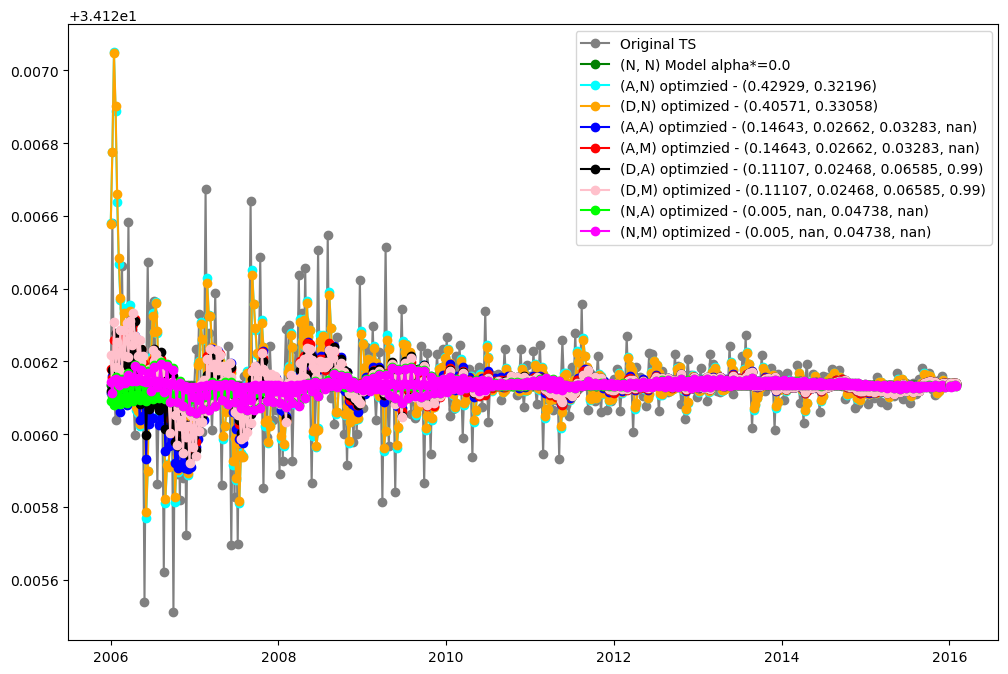

In [95]:
tsA = last_ten_years[['B']]
tsA.dropna(inplace=True)

fit1 = SimpleExpSmoothing(tsA).fit(method='least_squares')
fcast1 = fit1.forecast(5)
alpha1 = np.round(fit1.params['smoothing_level'],2)

fit2 = Holt(tsA).fit()
fcast2 = fit2.forecast(5)
alpha2 = np.round(fit2.params['smoothing_level'],5)
kappa2 = np.round(fit2.params['smoothing_trend'],5)


fit3 = Holt(tsA, damped_trend=True).fit()
fcast3 = fit3.forecast(5)
alpha3 = np.round(fit3.params['smoothing_level'],5)
kappa3 = np.round(fit3.params['smoothing_trend'],5)

m = 4

fit4 = ExponentialSmoothing(tsA, seasonal_periods=m, trend='add', seasonal='add').fit()
fcast4 = fit4.forecast(5)
alpha4=np.round(fit4.params['smoothing_level'],5)
kappa4=np.round(fit4.params['smoothing_trend'],5)
gamma4=np.round(fit4.params['smoothing_seasonal'],5)
phi4=np.round(fit4.params['damping_trend'],5)



fit5 = ExponentialSmoothing(tsA, seasonal_periods=m, trend='add', seasonal='mul').fit()
fcast5 = fit5.forecast(5)
alpha5=np.round(fit5.params['smoothing_level'],5)
kappa5=np.round(fit5.params['smoothing_trend'],5)
gamma5=np.round(fit5.params['smoothing_seasonal'],5)
phi5=np.round(fit5.params['damping_trend'],5)

fit6 = ExponentialSmoothing(tsA, seasonal_periods=m, trend='add', seasonal='add', damped_trend=True).fit()
fcast6 = fit6.forecast(5)
alpha6=np.round(fit6.params['smoothing_level'],5)
kappa6=np.round(fit6.params['smoothing_trend'],5)
gamma6=np.round(fit6.params['smoothing_seasonal'],5)
phi6=np.round(fit6.params['damping_trend'],5)

fit7 = ExponentialSmoothing(tsA, seasonal_periods=m, trend='add', seasonal='mul', damped_trend=True).fit()
fcast7 = fit7.forecast(5)
alpha7=np.round(fit7.params['smoothing_level'],5)
kappa7=np.round(fit7.params['smoothing_trend'],5)
gamma7=np.round(fit7.params['smoothing_seasonal'],5)
phi7=np.round(fit7.params['damping_trend'],5)

fit8 = ExponentialSmoothing(tsA, seasonal_periods=m, trend=None, seasonal='add').fit()
fcast8 = fit8.forecast(5)
alpha8=np.round(fit8.params['smoothing_level'],5)
kappa8=np.round(fit8.params['smoothing_trend'],5)
gamma8=np.round(fit8.params['smoothing_seasonal'],5)
phi8=np.round(fit8.params['damping_trend'],5)

fit9 = ExponentialSmoothing(tsA, seasonal_periods=m, trend=None, seasonal='mul').fit()
fcast9 = fit9.forecast(5)
alpha9=np.round(fit9.params['smoothing_level'],5)
kappa9=np.round(fit9.params['smoothing_trend'],5)
gamma9=np.round(fit9.params['smoothing_seasonal'],5)
phi9=np.round(fit9.params['damping_trend'],5)

plt.figure(figsize=(12,8))

plt.plot(tsA,marker='o', color='gray',label='Original TS')
plt.plot(fit1.fittedvalues,marker='o', color='green')
plt.plot(fit2.fittedvalues, marker="o", color='cyan')
plt.plot(fit3.fittedvalues, marker="o", color='orange')
plt.plot(fit4.fittedvalues, marker="o", color='blue')
plt.plot(fit5.fittedvalues, marker="o", color='red')
plt.plot(fit6.fittedvalues, marker="o", color='black')
plt.plot(fit7.fittedvalues, marker="o", color='pink')
plt.plot(fit8.fittedvalues, marker="o", color='lime')
plt.plot(fit9.fittedvalues, marker="o", color='magenta')

plt.plot(fcast1,marker='o', color='green', label= f'(N, N) Model alpha*={alpha1}')
plt.plot(fcast2, color='cyan', marker="o", label=f"(A,N) optimzied - {alpha2, kappa2}")
plt.plot(fcast3, color='orange', marker="o", label=f"(D,N) optimized - {alpha3, kappa3}")
plt.plot(fcast4, color='blue', marker="o", label=f"(A,A) optimzied - {alpha4, kappa4, gamma4, phi4}")
plt.plot(fcast5, color='red', marker="o", label=f"(A,M) optimzied - {alpha5, kappa5, gamma5, phi5}")
plt.plot(fcast6, color='black', marker="o", label=f"(D,A) optimzied - {alpha6, kappa6, gamma6, phi6}")
plt.plot(fcast7, color='pink', marker="o", label=f"(D,M) optimized - {alpha7, kappa7, gamma7, phi7}")
plt.plot(fcast8, color='lime', marker="o", label=f"(N,A) optimized - {alpha8, kappa8, gamma8, phi8}")
plt.plot(fcast9, color='magenta', marker="o", label=f"(N,M) optimized - {alpha9, kappa9, gamma9, phi9}")
plt.legend()

plt.show()